In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
import warnings
warnings.filterwarnings('ignore')

2024-08-04 18:12:30.957987: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-04 18:12:30.964446: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-04 18:12:31.010882: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-04 18:12:31.071300: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 18:12:31.130714: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [2]:
df = pd.read_csv('customer_attrition.csv')

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#keeping only the most relevant features
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [6]:
columns = list(df.columns)
columns.remove('Exited')
X = df[columns]
Y = df[['Exited']]

In [7]:
#converting string values to numerical ones using label encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
le = LabelEncoder()

X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])

X = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [24]:
#training the models using 4 for-loops

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import Precision, Recall

num_features = X_train.shape[1] # Number of features in your input data


epochs = [10, 20, 30]
activations = ['sigmoid', 'relu']
learning_rates = [0.1, 0.01, 0.001]
layers = [1, 2, 3]
results = []
plot_data = []

for layer in layers:
    for activation in activations:
        for epoch in epochs:
            for learning_rate in learning_rates:
                # Building neural network model using Sequential API
                model = Sequential()
                model.add(Input(shape=(num_features,), name='input'))
                if layer == 1:
                    model.add(Dense(128, activation=activation, name='hl1'))  # Hidden layer with 128 neurons
                elif layer == 2:
                    model.add(Dense(64, activation=activation, name='hl2'))  # Hidden layer with 64 neurons
                else:
                    model.add(Dense(32, activation=activation, name='hl3'))  # Hidden layer with 32 neurons
                model.add(Dense(1, activation='sigmoid', name='output'))  # Output layer with 1 neuron and sigmoid activation for binary classification

                # Compiling the model
                opt = optimizers.Adam(learning_rate=learning_rate)
                model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

                # Training the model using the training data
                history = model.fit(X_train, Y_train, epochs=epoch, batch_size=32, validation_split=15/85, verbose=0)

                # Collecting plot data
                plot_data.append({
                    'layer': layer,
                    'activation': activation,
                    'epochs': epoch,
                    'learning_rate': learning_rate,
                    'train_loss': history.history['loss'],
                    'val_loss': history.history['val_loss'],
                    'train_accuracy': history.history.get('accuracy', []),
                    'val_accuracy': history.history.get('val_accuracy', [])
                })

                # Evaluating the model on the testing data
                loss, accuracy, precision, recall = model.evaluate(X_test, Y_test, batch_size=32)
        
                results.append([layer, activation, epoch, learning_rate, loss, accuracy, precision, recall])

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.8557 - loss: 0.3502 - precision_56: 0.6814 - recall_56: 0.5060
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.8465 - loss: 0.3657 - precision_57: 0.6274 - recall_57: 0.5479
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.8144 - loss: 0.4292 - precision_58: 0.5897 - recall_58: 0.2064
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.8664 - loss: 0.3455 - precision_59: 0.7985 - recall_59: 0.4342
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.8582 - loss: 0.3450 - precision_60: 0.6715 - recall_60: 0.5512
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.8296 - loss: 0.4119 - precision_61: 0.7159 - recall_61: 0.2289
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.8471 - loss: 0.3539 - precision_62: 0.6236 - recall_62: 0.5697
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.8668 - loss: 0.3313 - precision_63: 0.7727 - recall_63: 0.4609
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.8

In [25]:
#print the results using tabulate
from tabulate import tabulate
headers = ['Layers', 'Activation', 'Epochs', 'Learning Rate', 'Loss', 'Accuracy', 'Precision', 'Recall']
print(tabulate(results, headers=headers, tablefmt='grid'))

+----------+--------------+----------+-----------------+----------+------------+-------------+----------+
|   Layers | Activation   |   Epochs |   Learning Rate |     Loss |   Accuracy |   Precision |   Recall |
+==========+==============+==========+=================+==========+============+=============+==========+
|        1 | sigmoid      |       10 |           0.1   | 0.340707 |   0.863667 |    0.707838 | 0.510274 |
+----------+--------------+----------+-----------------+----------+------------+-------------+----------+
|        1 | sigmoid      |       10 |           0.01  | 0.359728 |   0.847667 |    0.621881 | 0.554795 |
+----------+--------------+----------+-----------------+----------+------------+-------------+----------+
|        1 | sigmoid      |       10 |           0.001 | 0.421465 |   0.817667 |    0.587678 | 0.212329 |
+----------+--------------+----------+-----------------+----------+------------+-------------+----------+
|        1 | sigmoid      |       20 |        

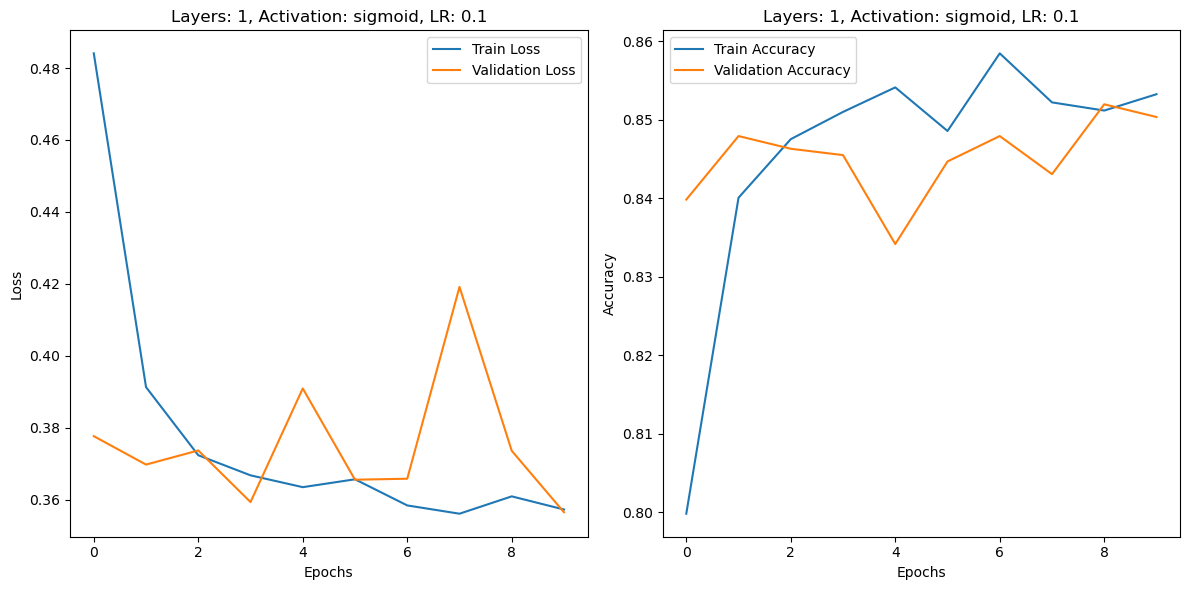

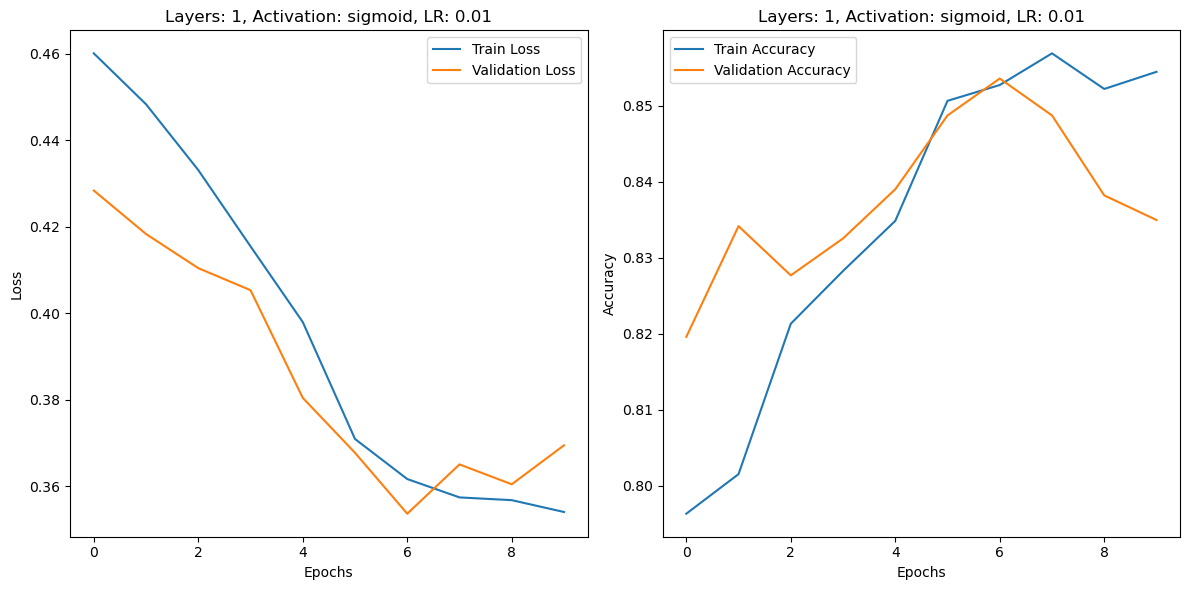

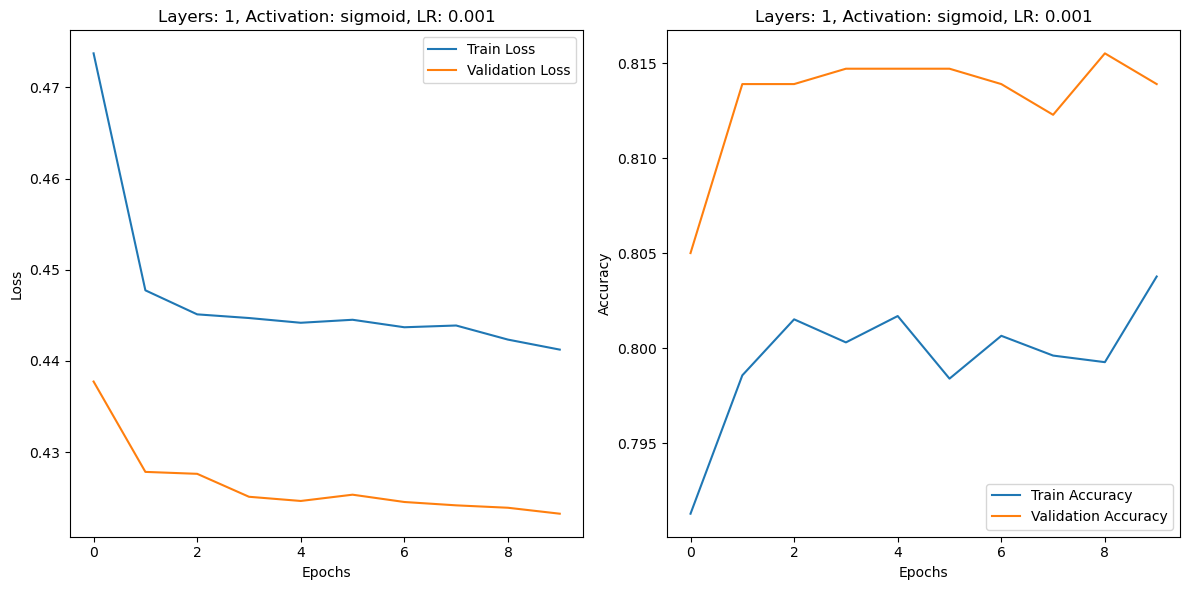

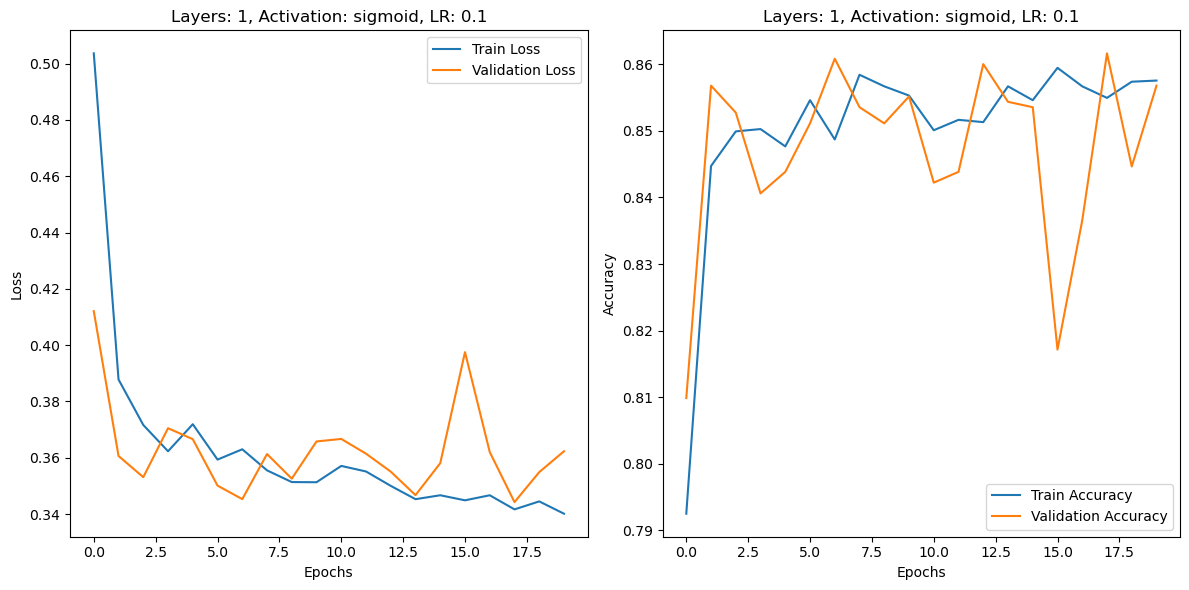

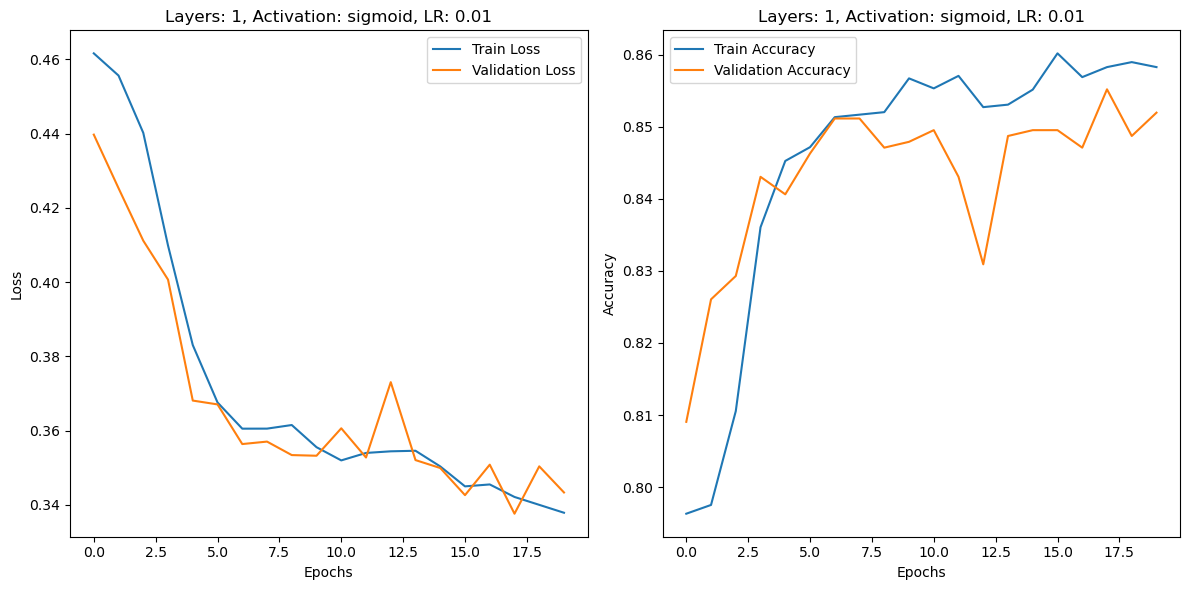

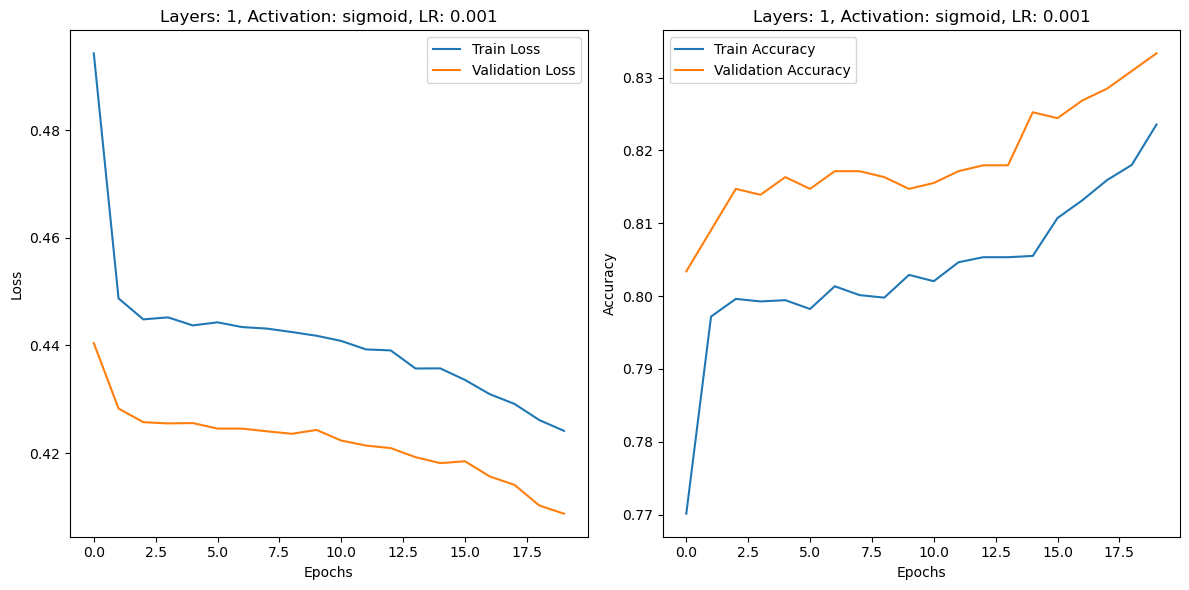

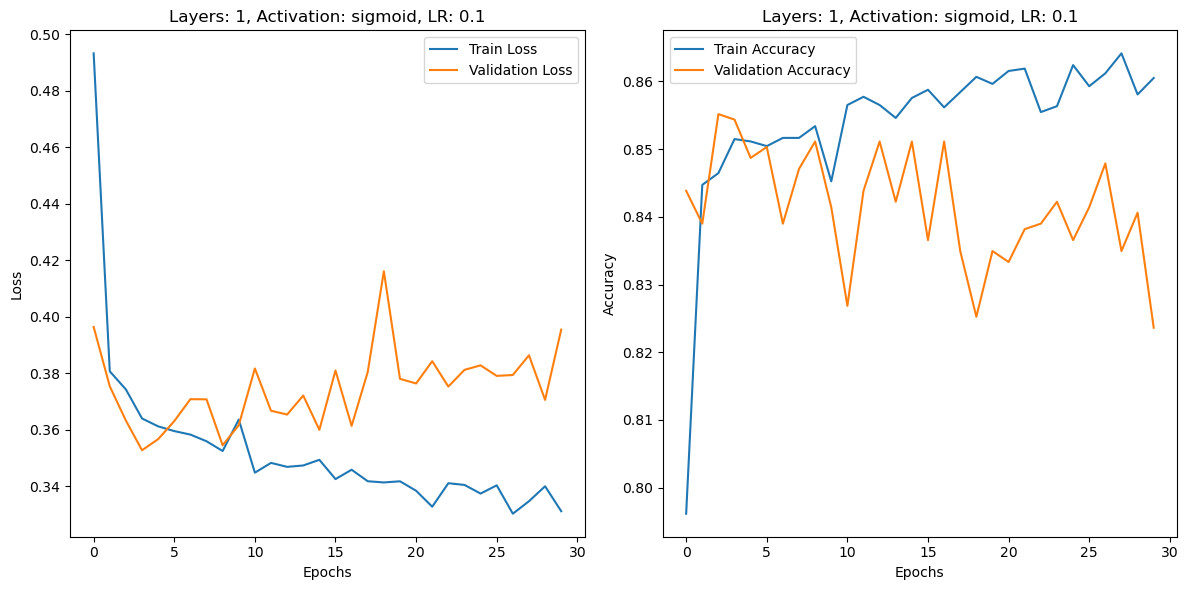

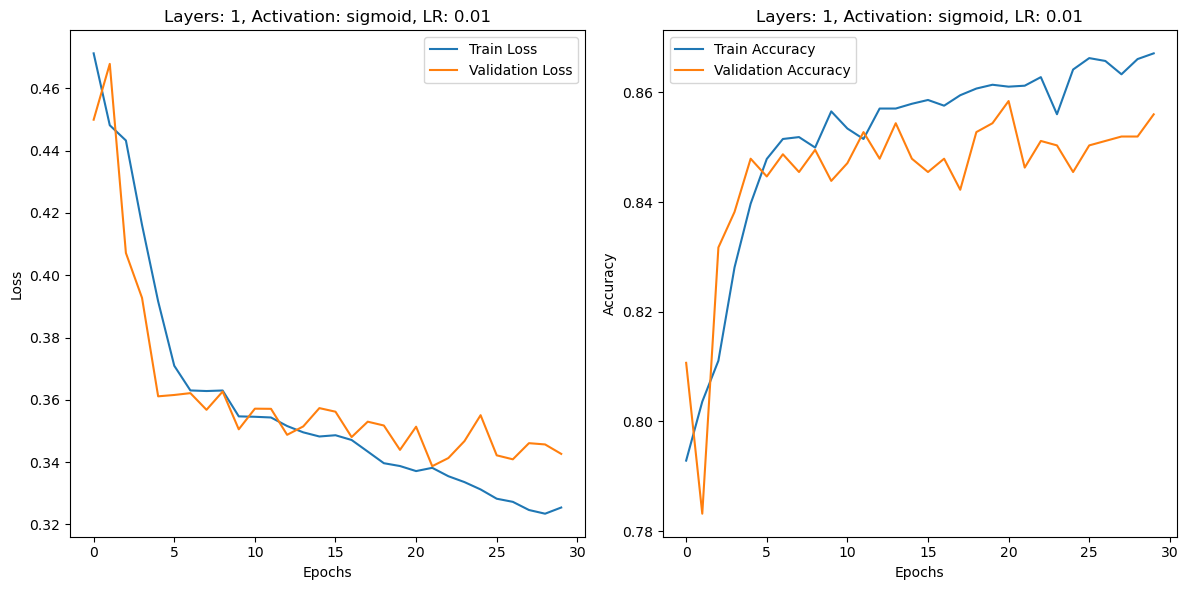

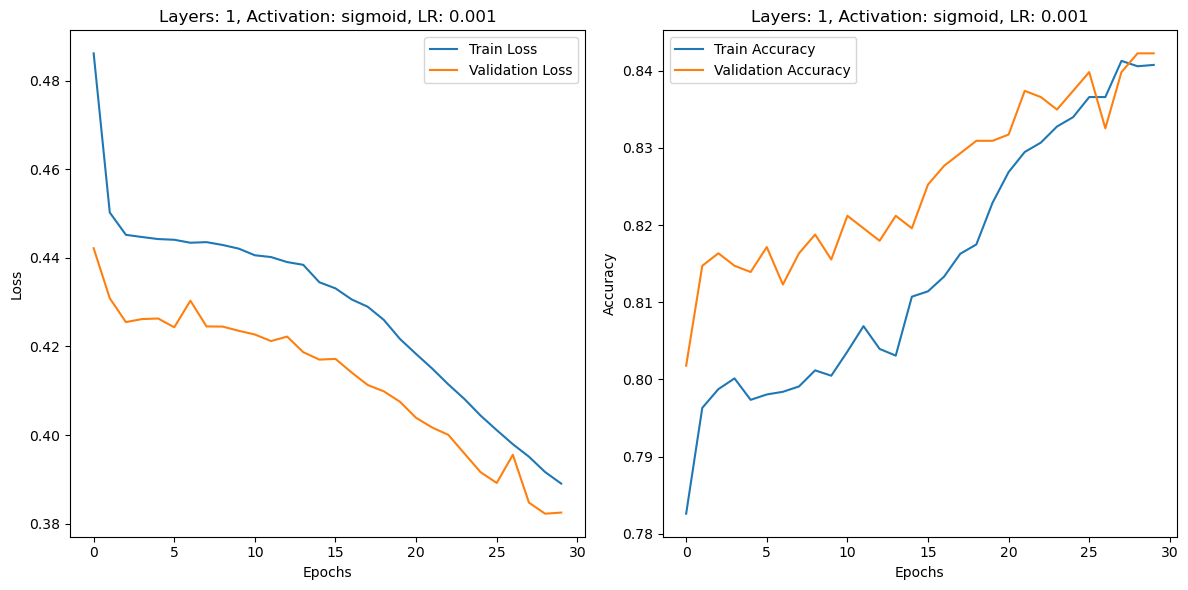

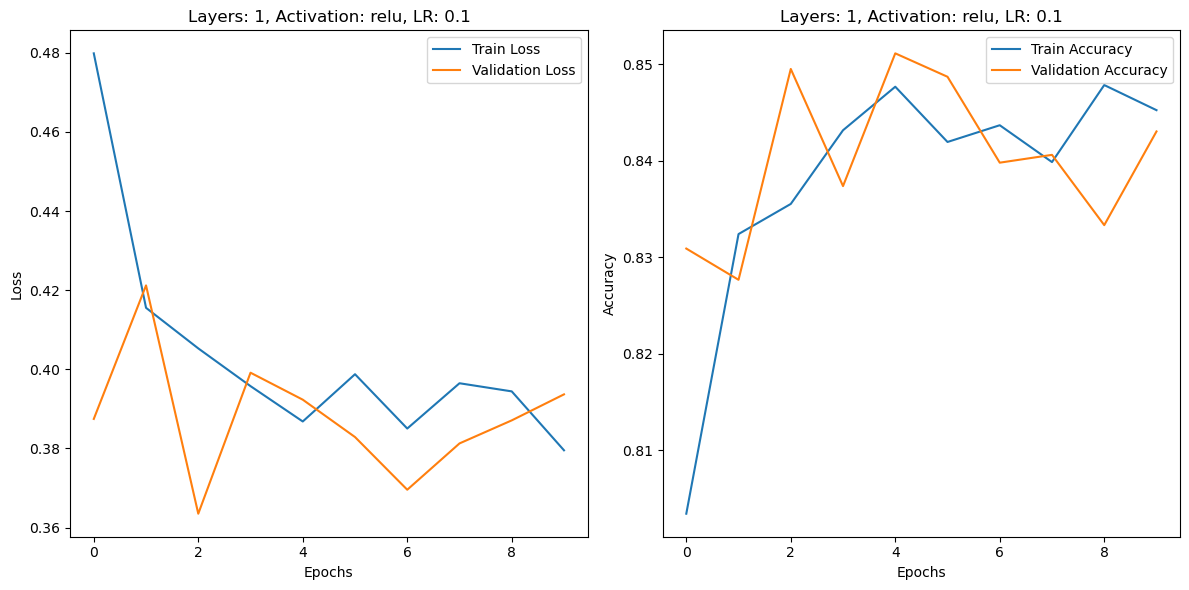

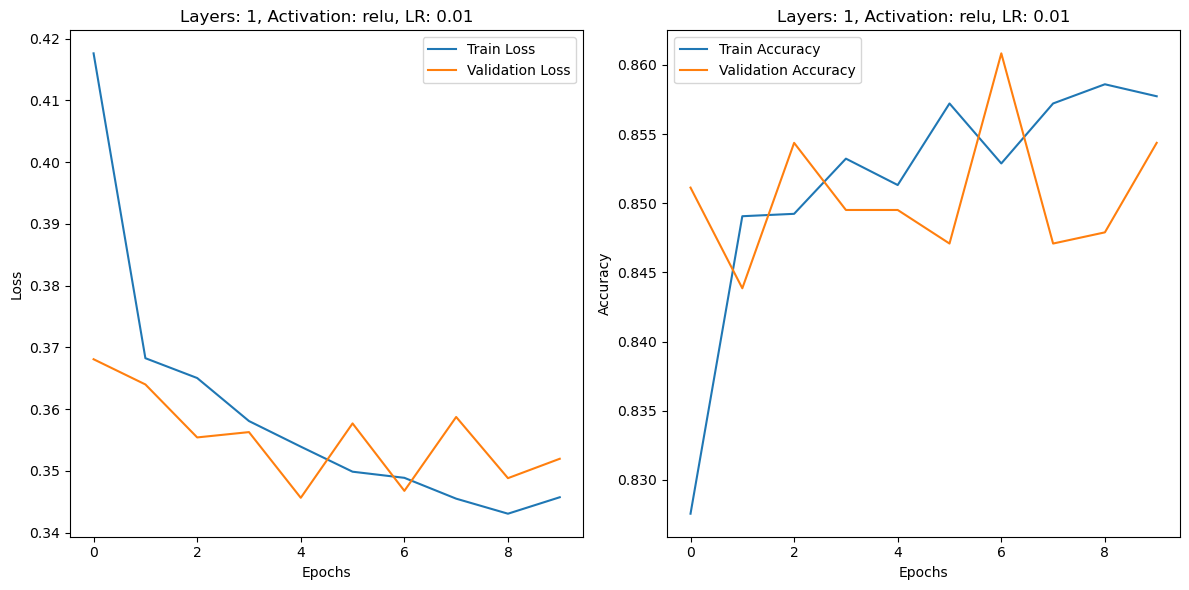

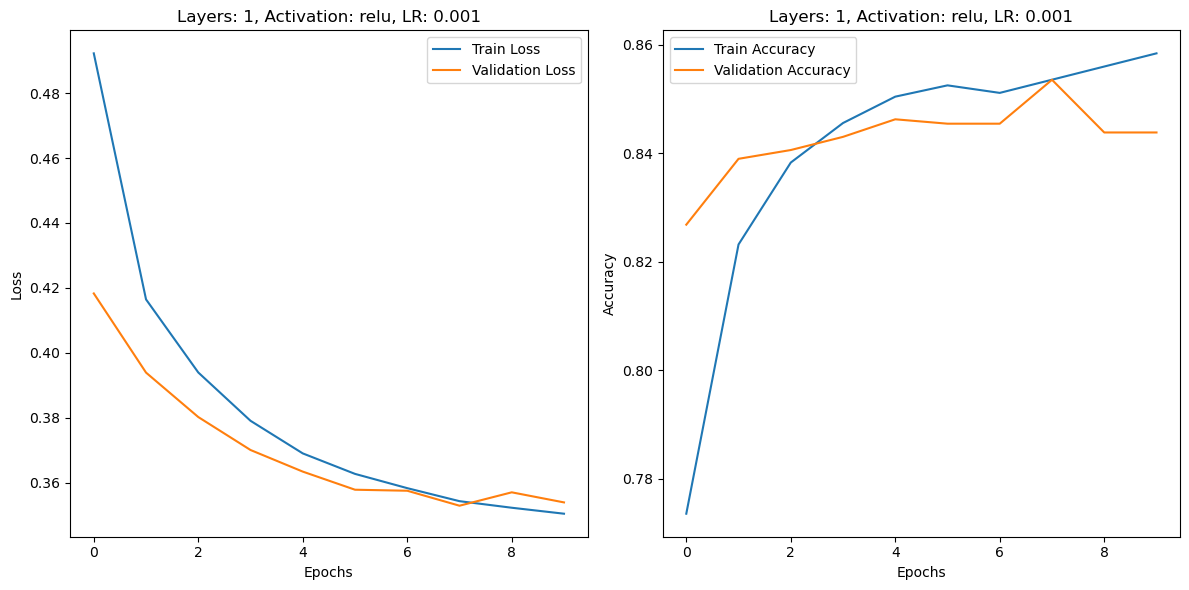

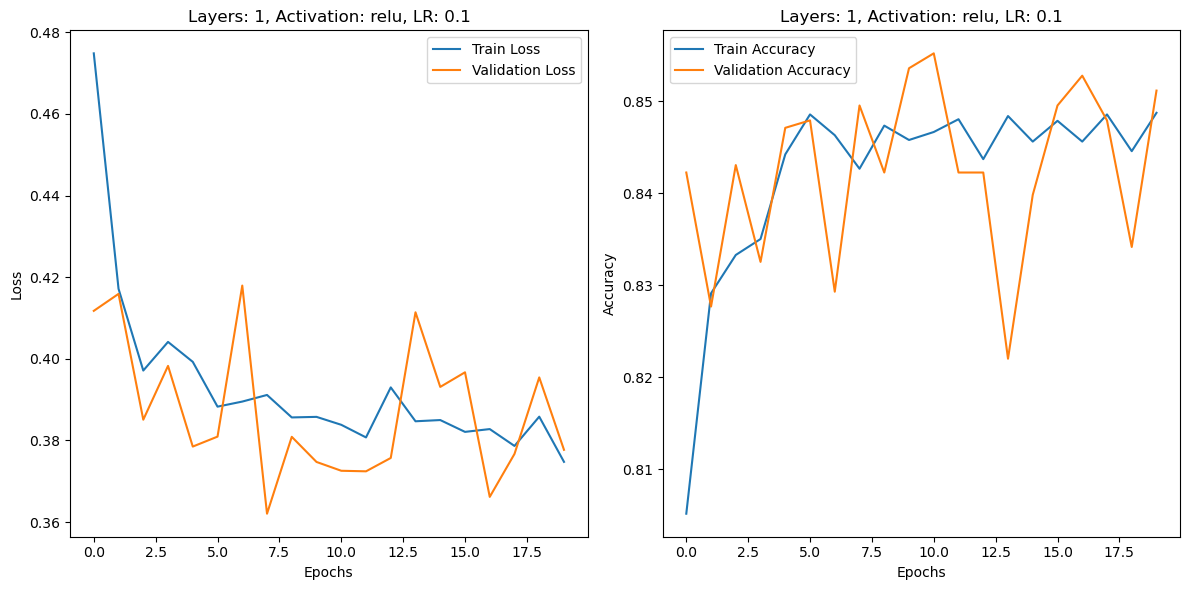

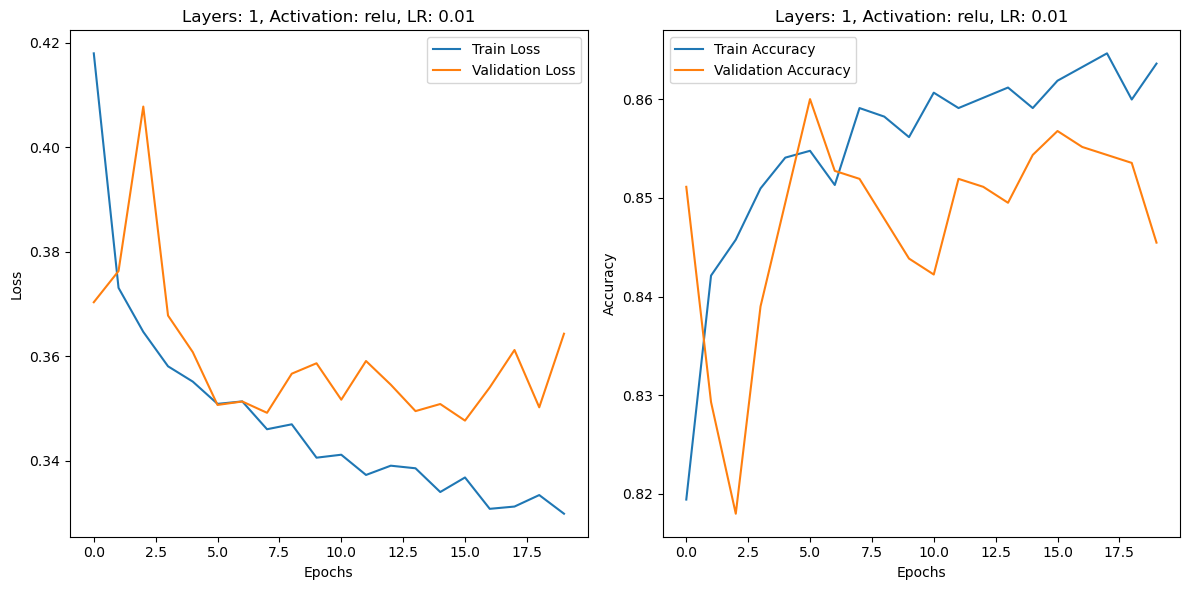

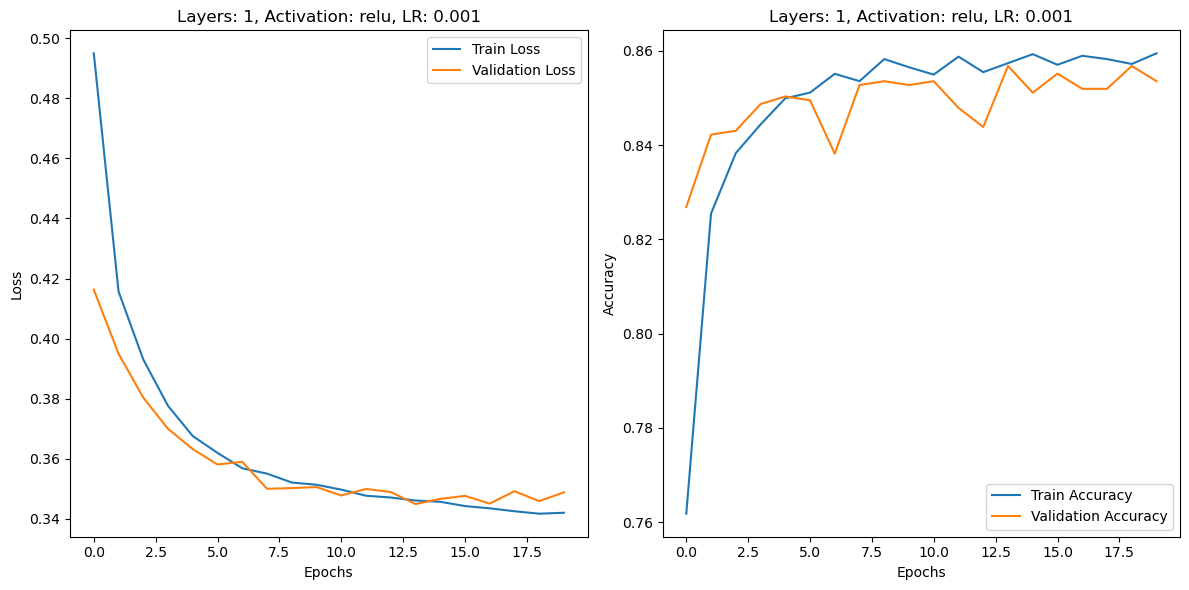

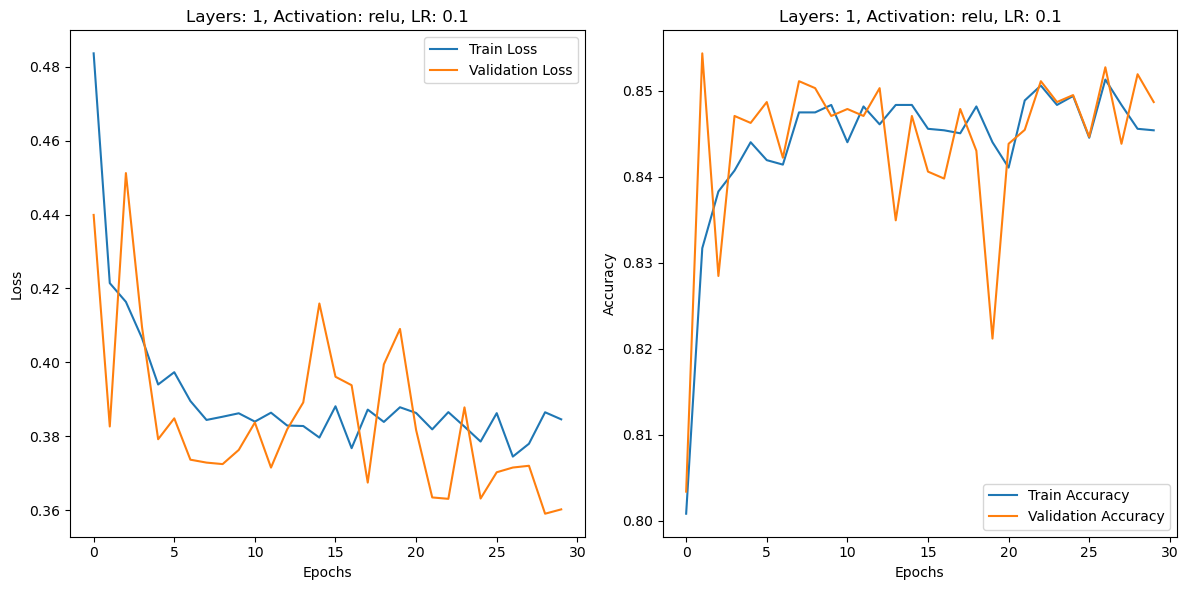

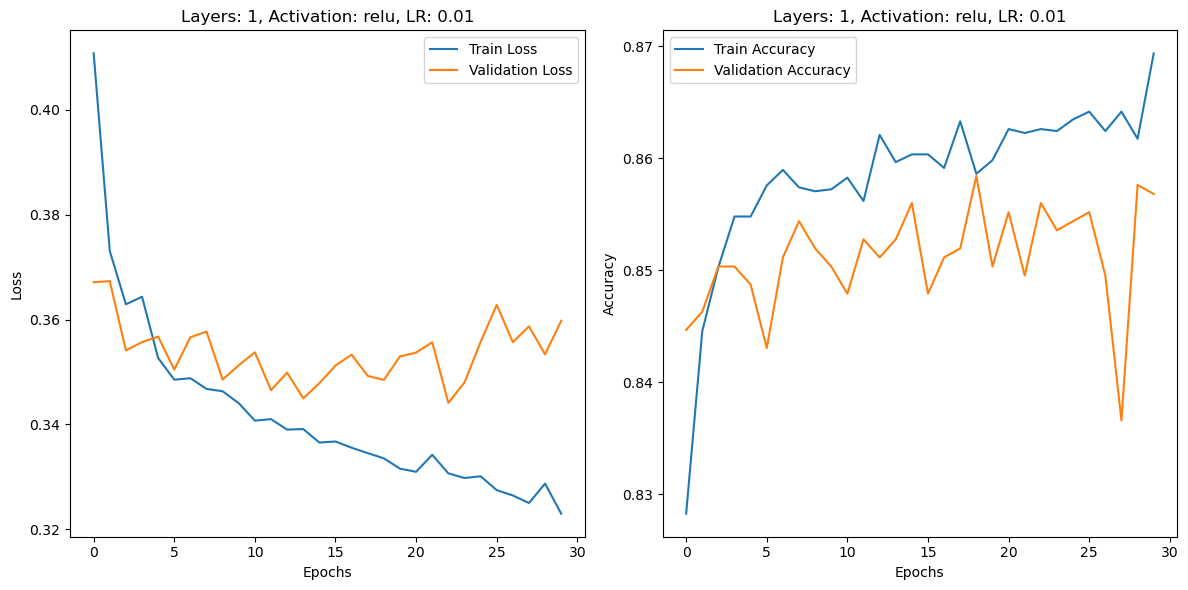

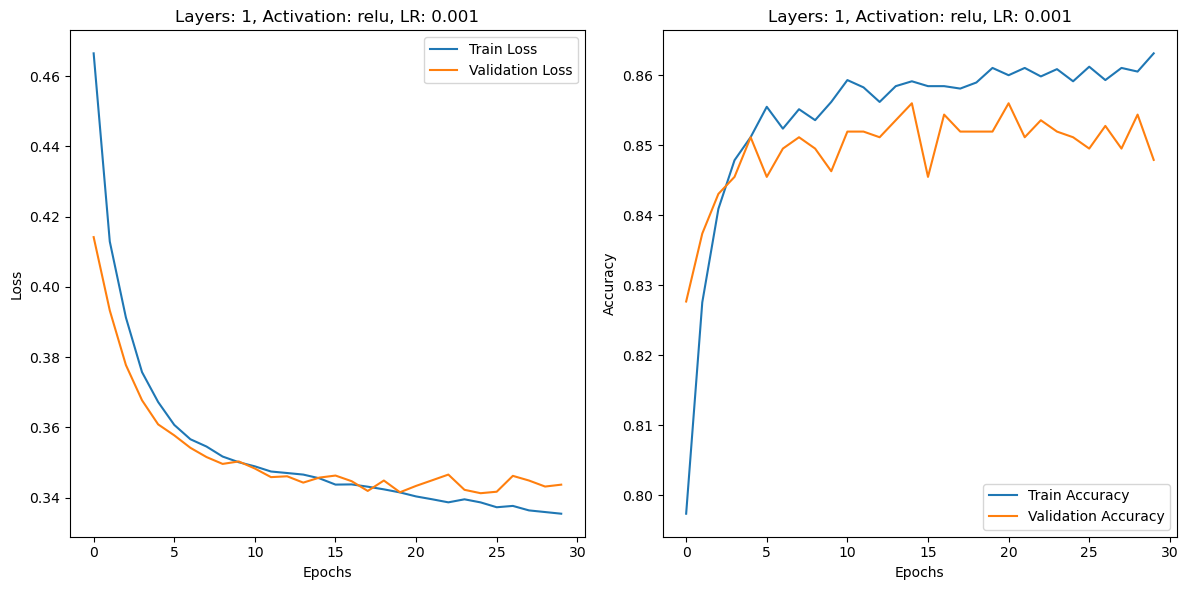

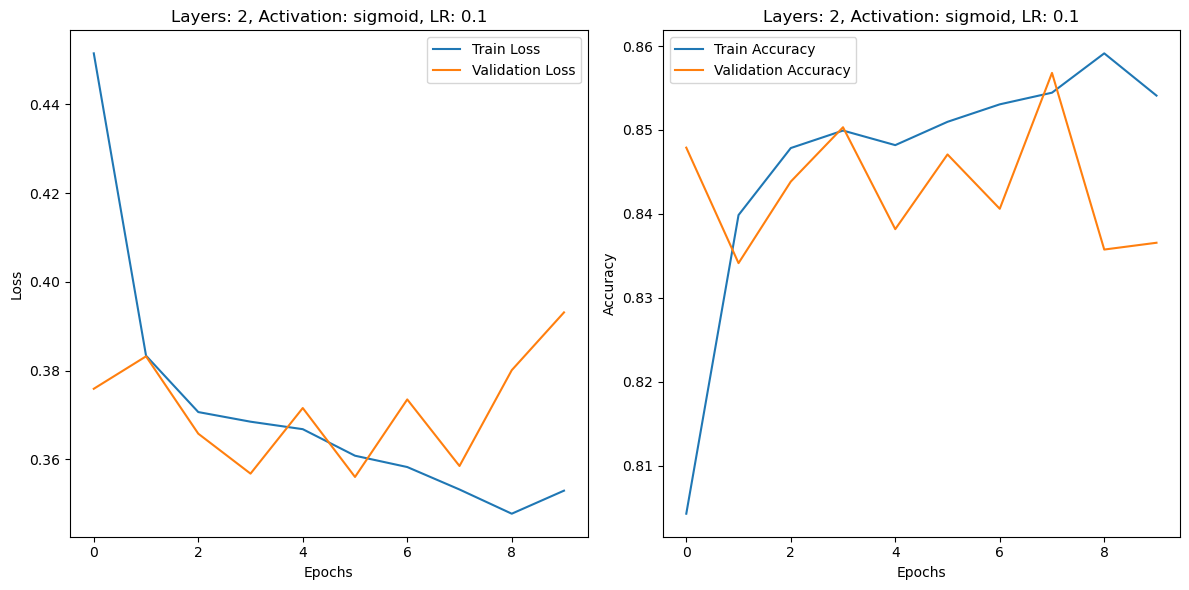

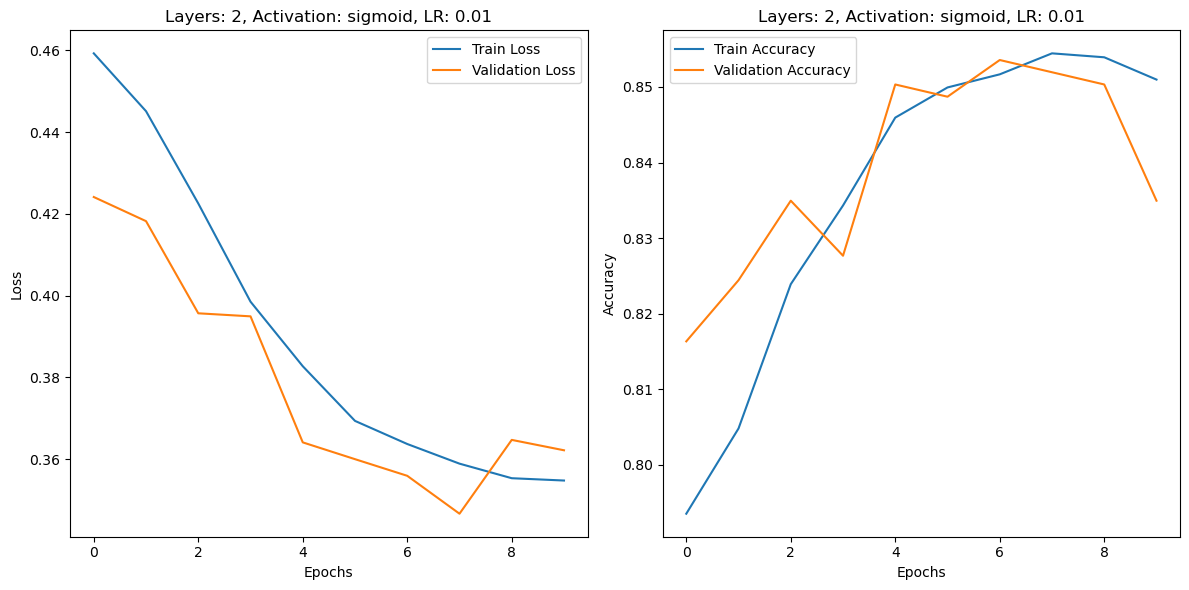

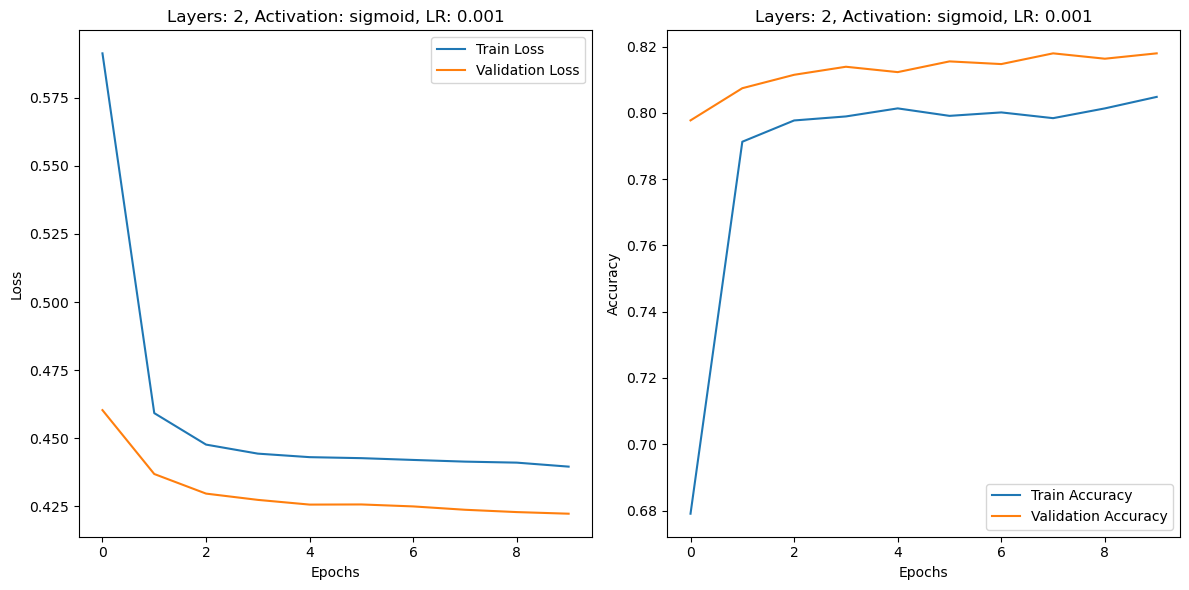

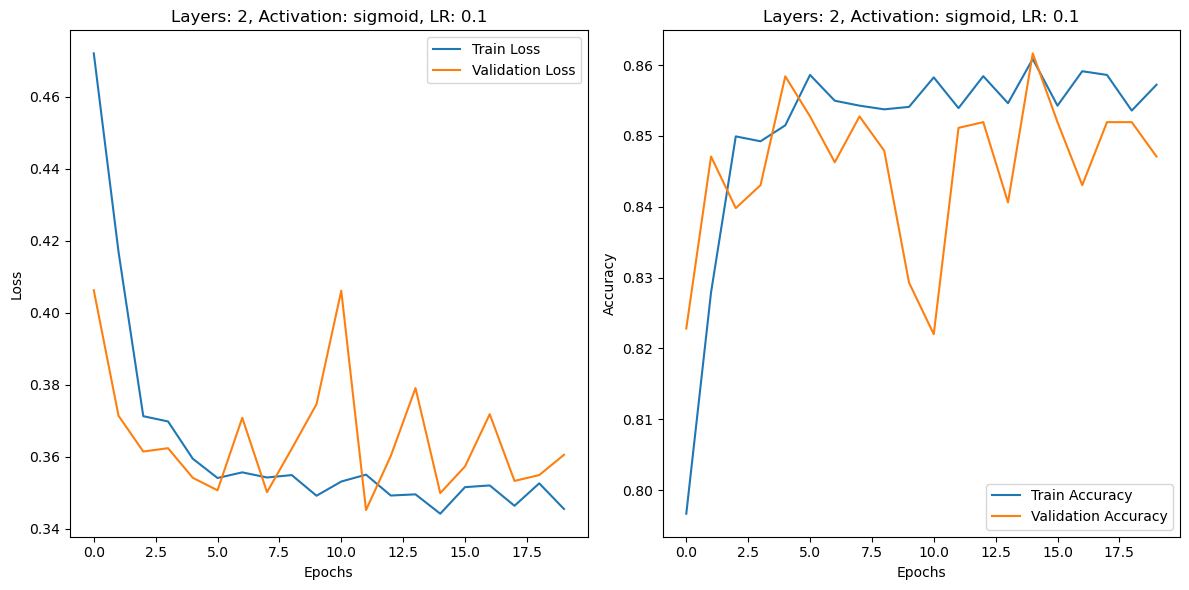

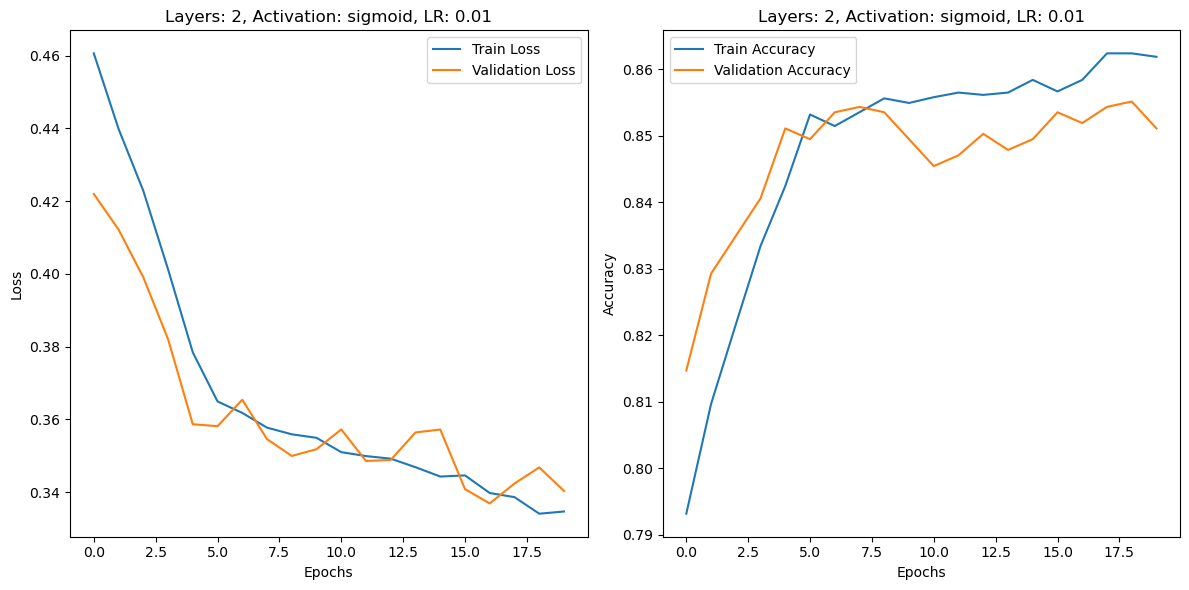

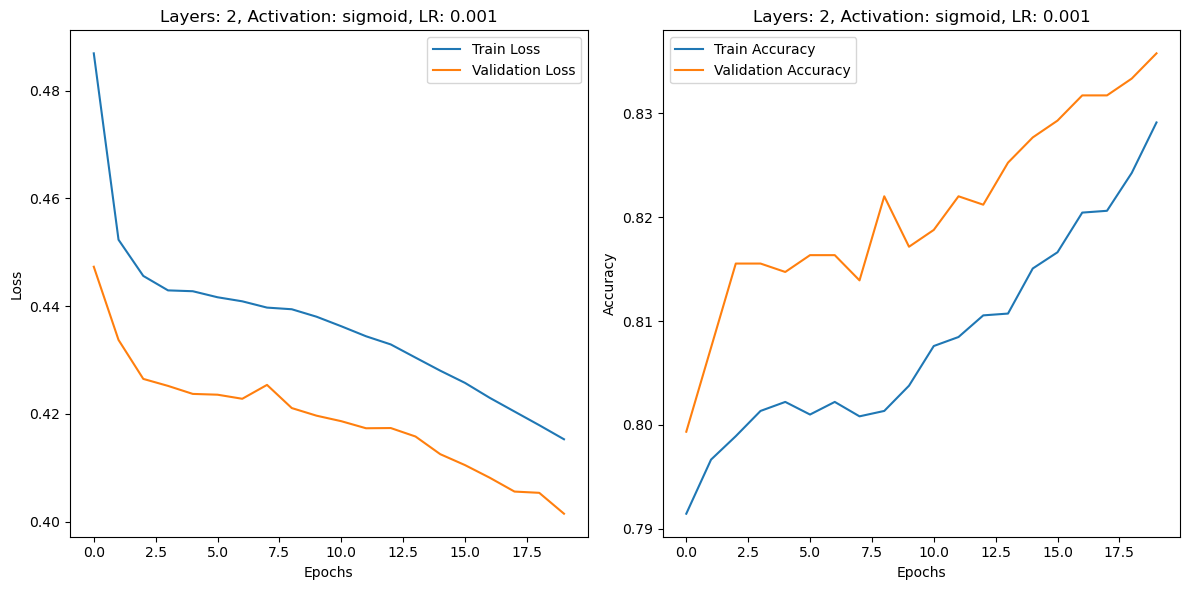

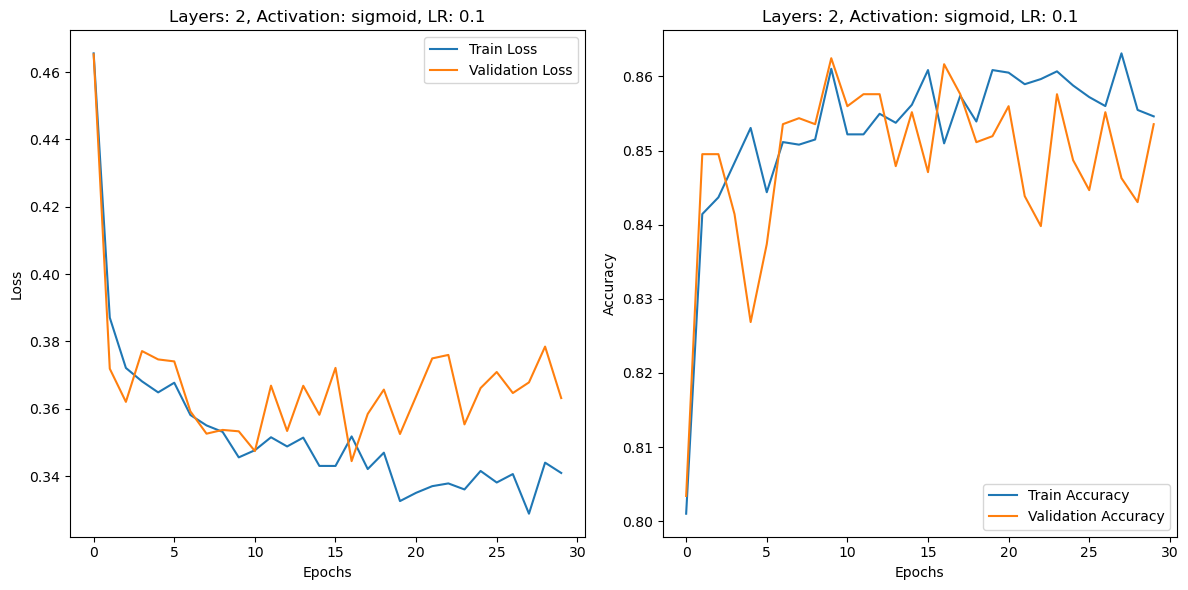

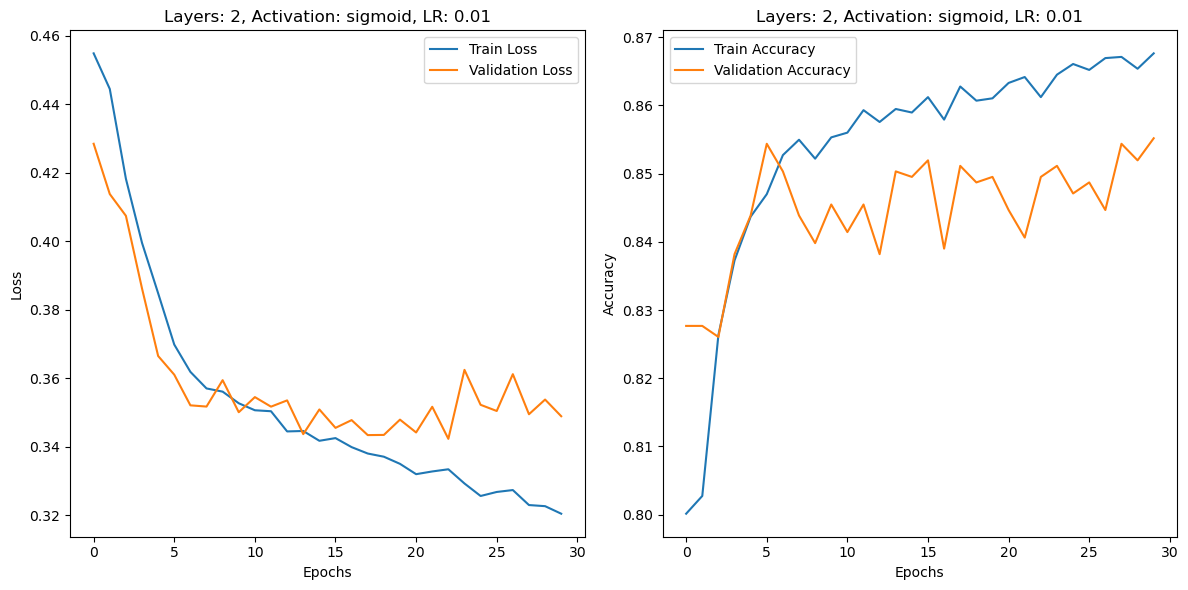

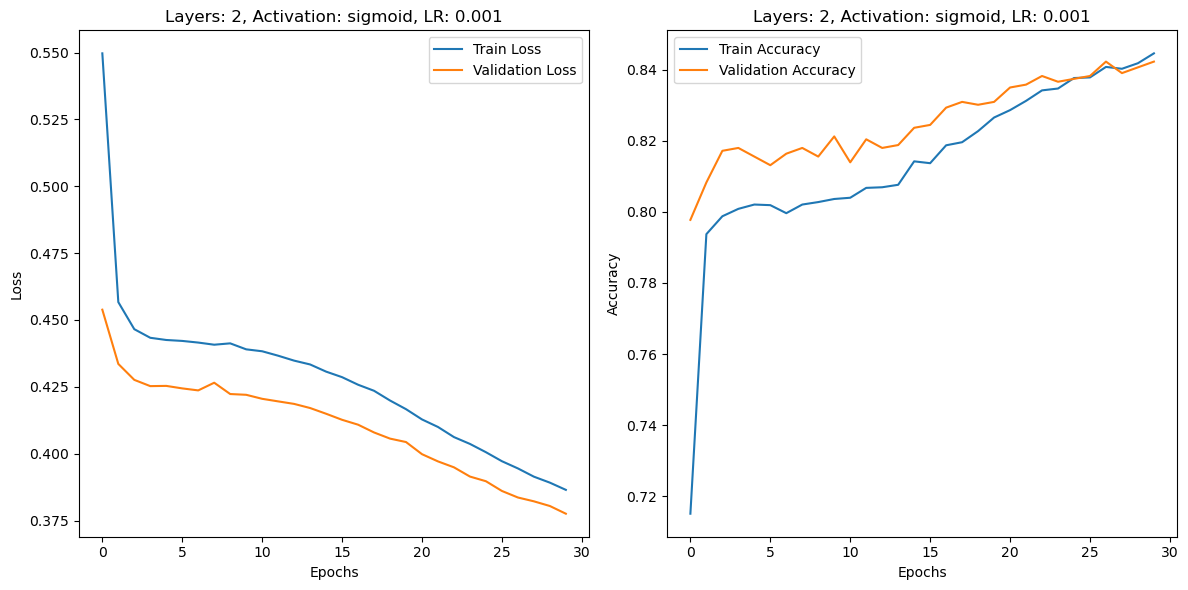

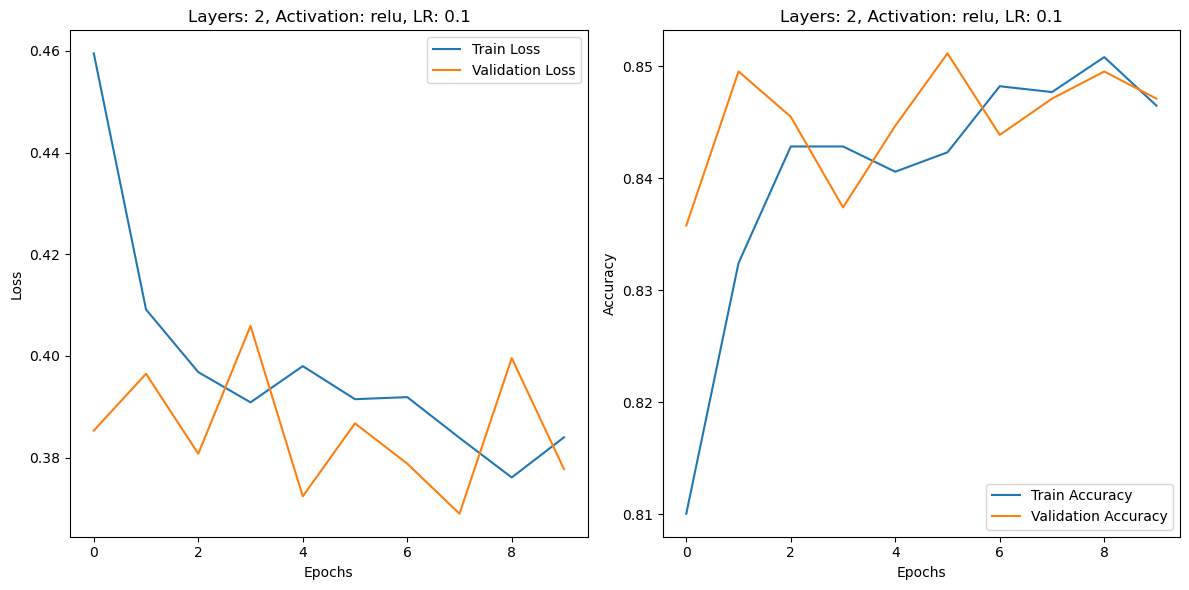

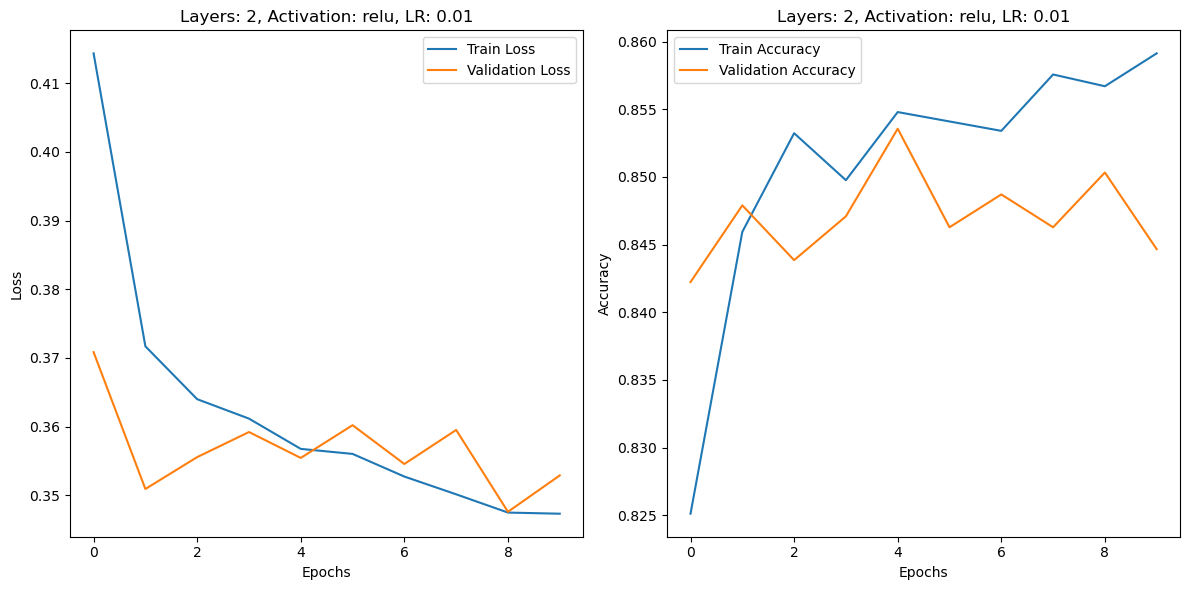

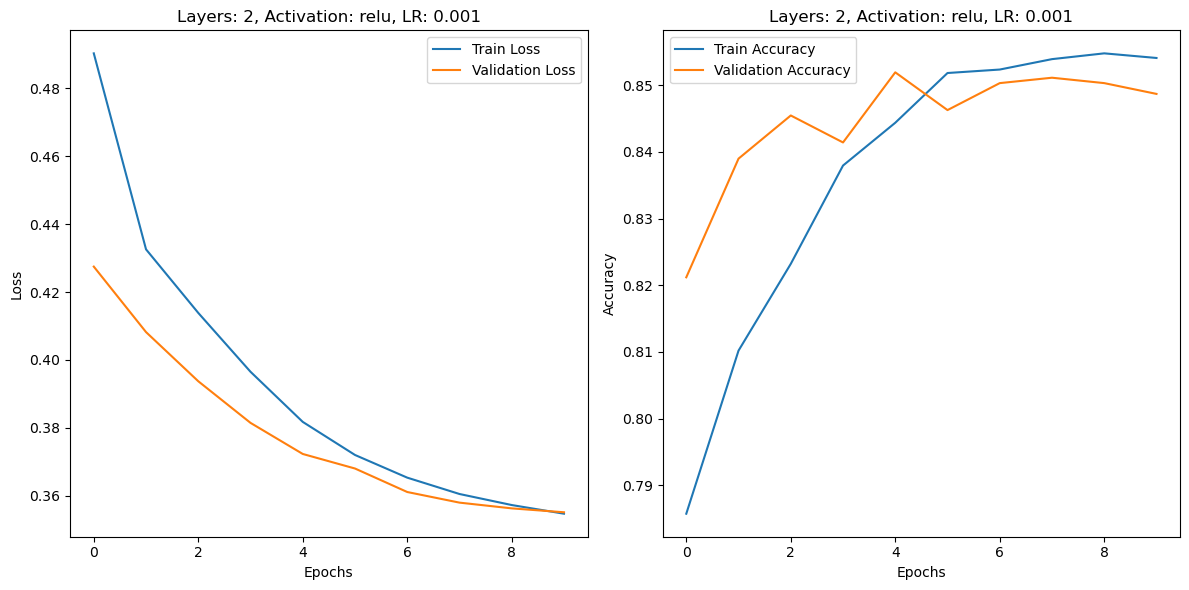

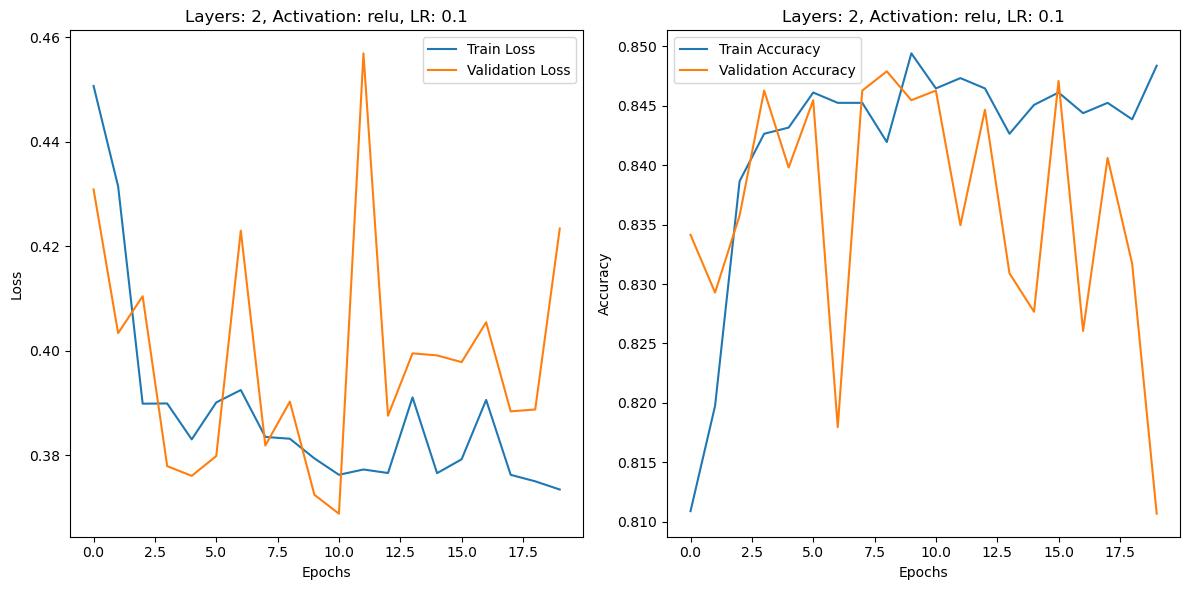

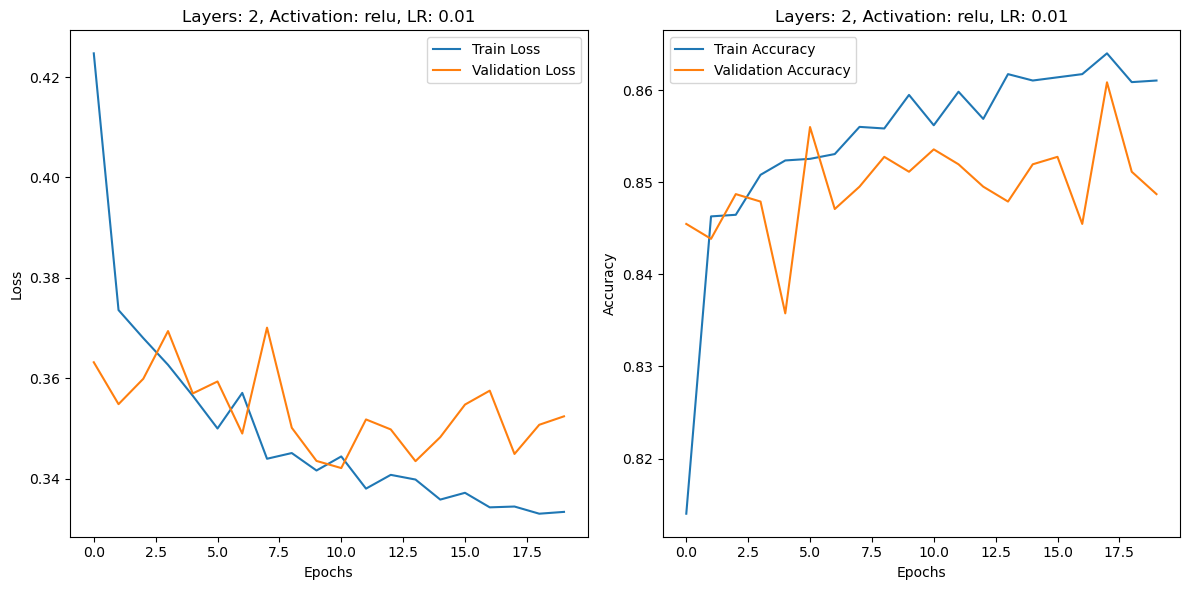

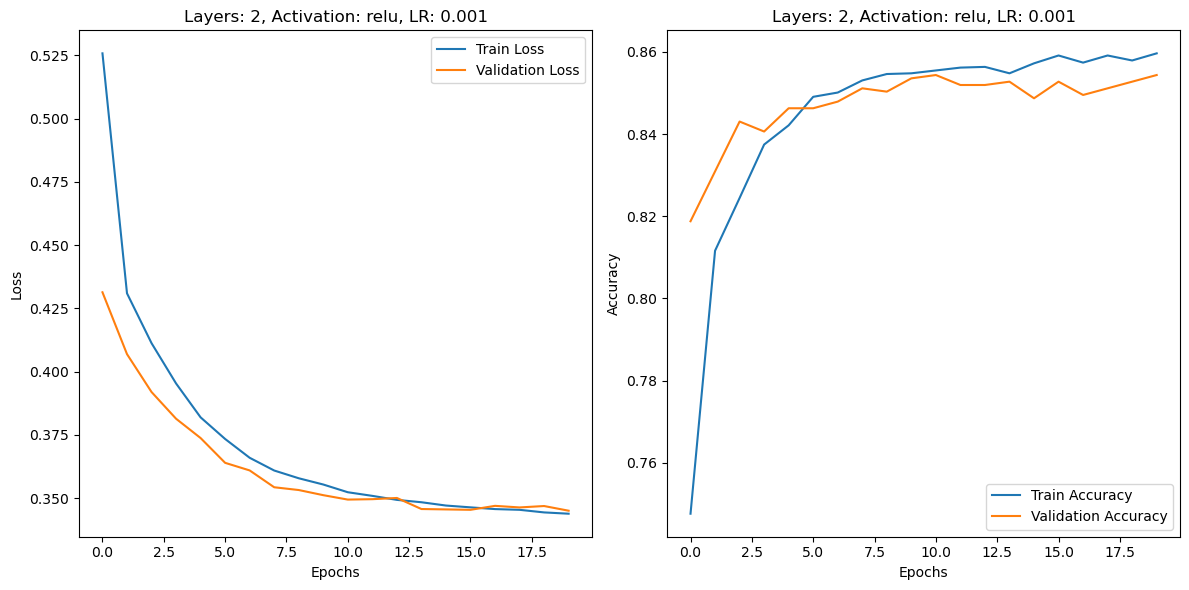

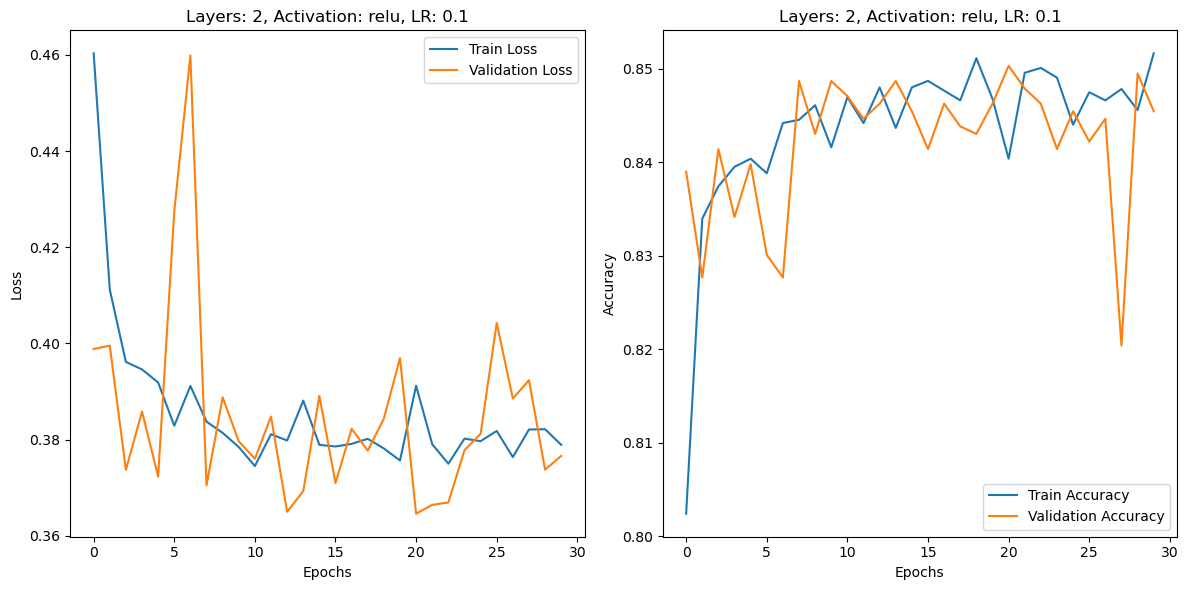

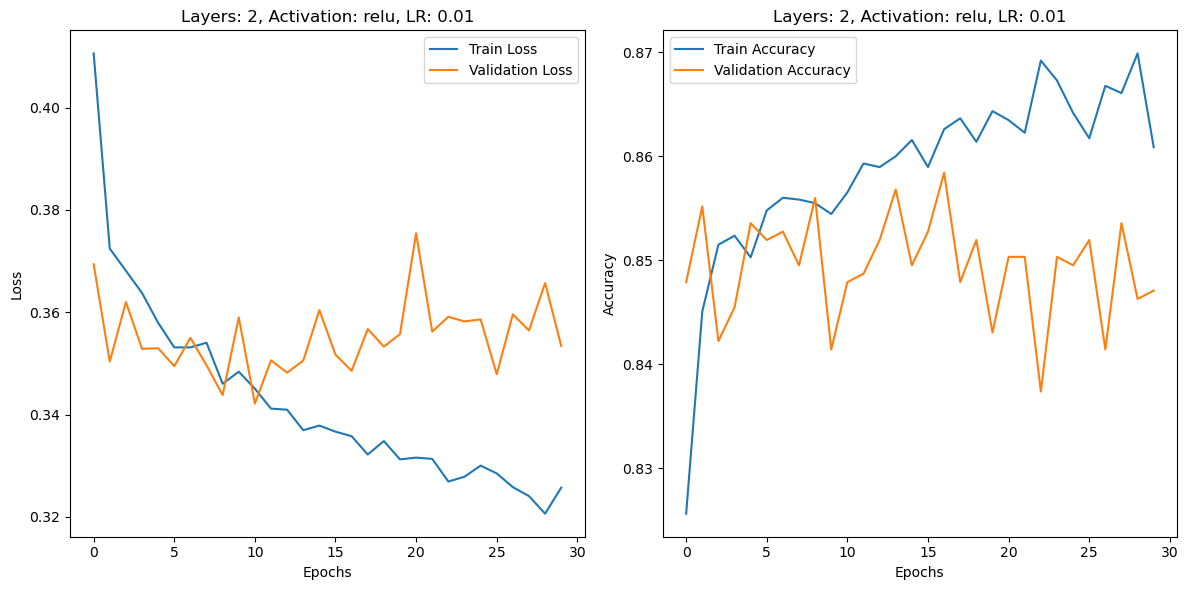

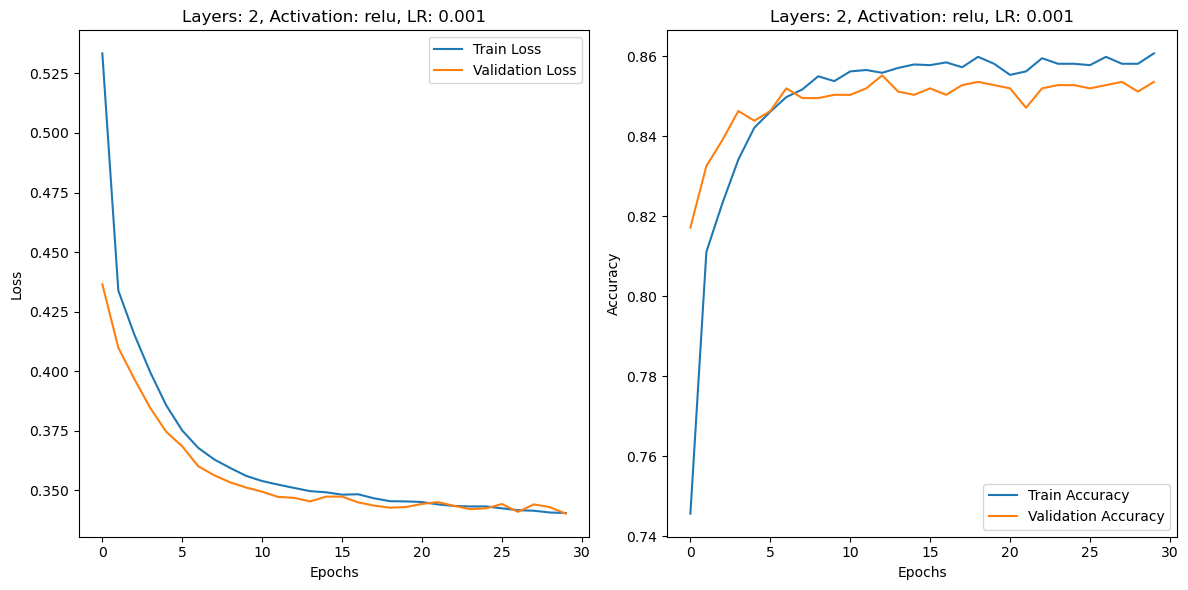

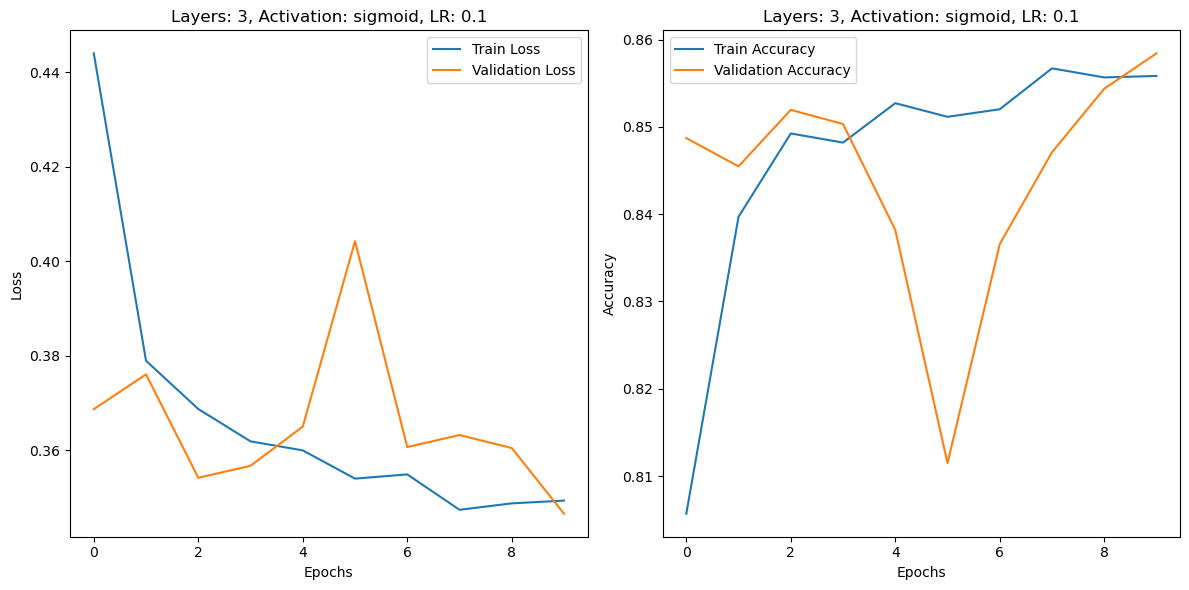

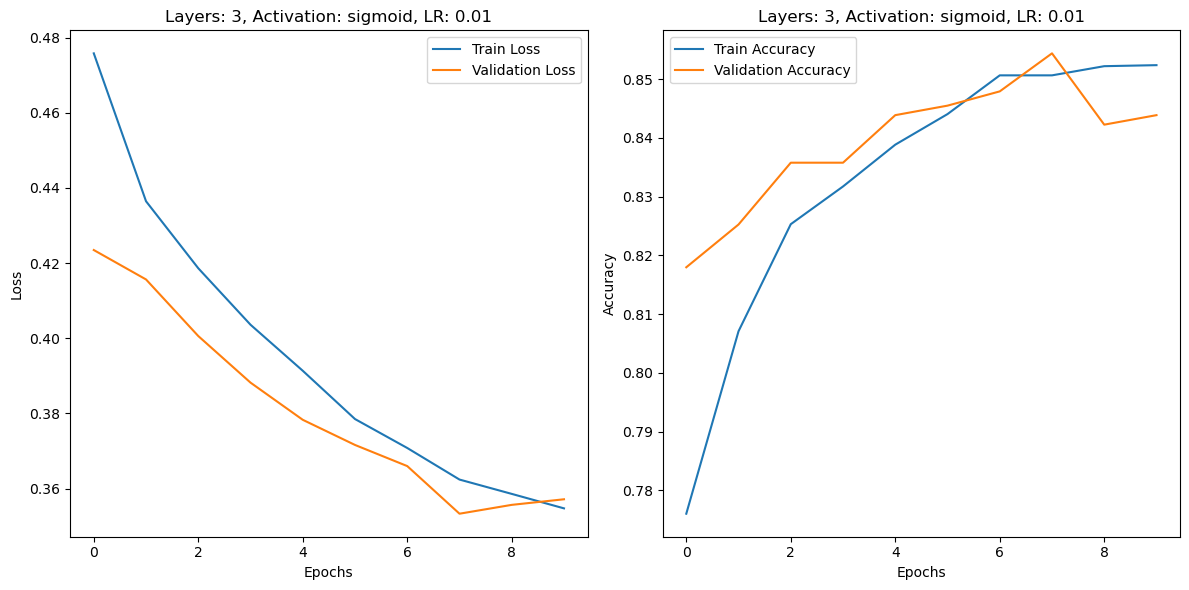

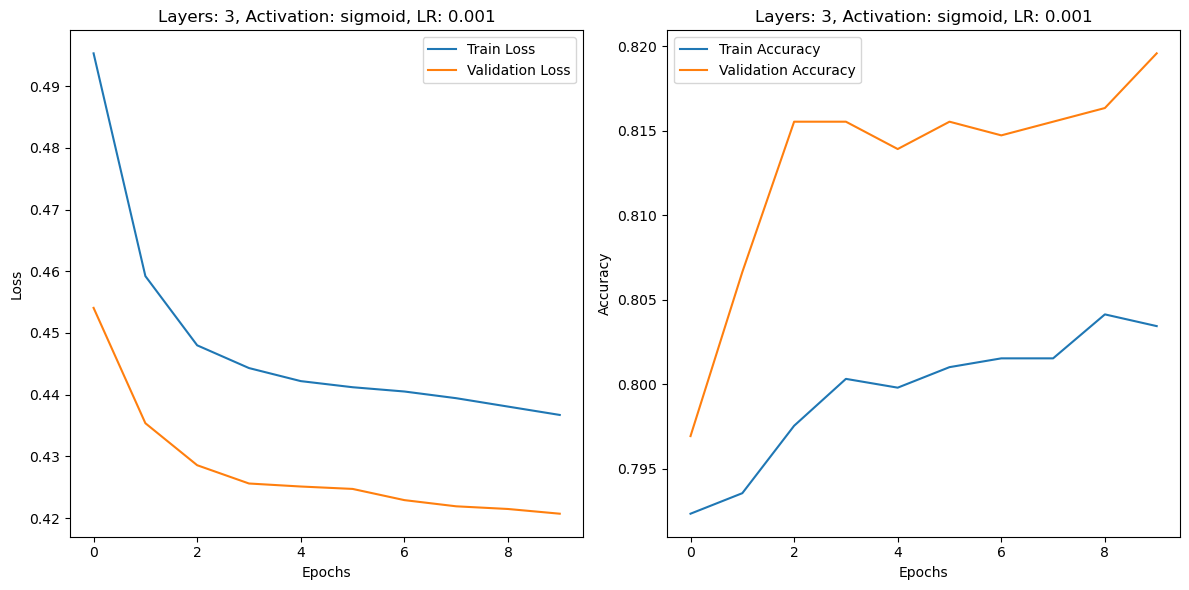

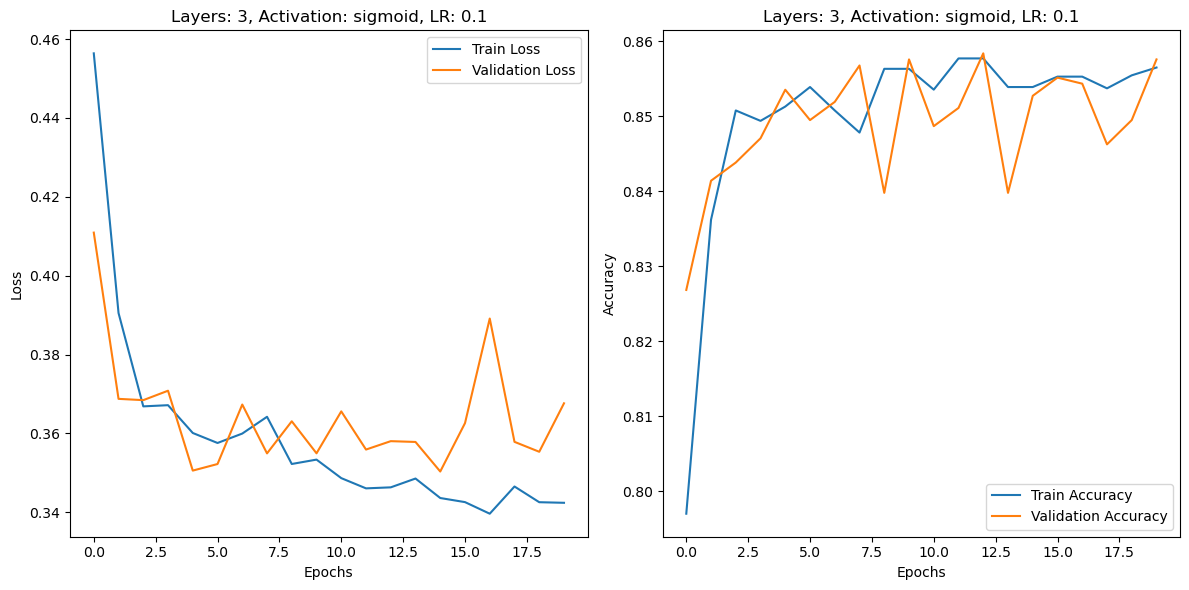

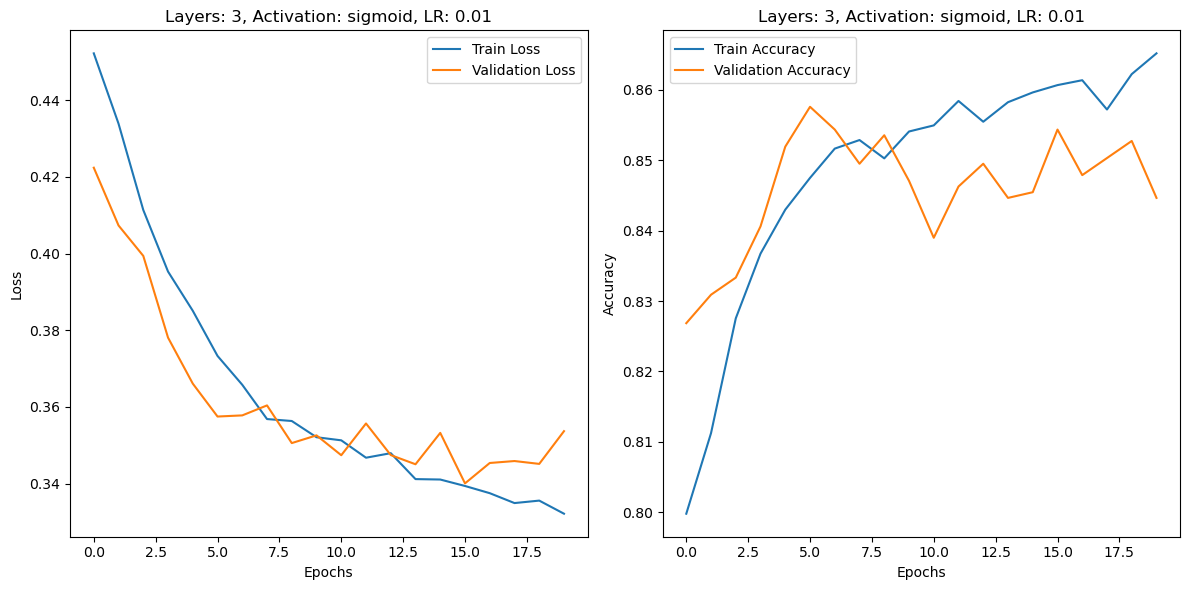

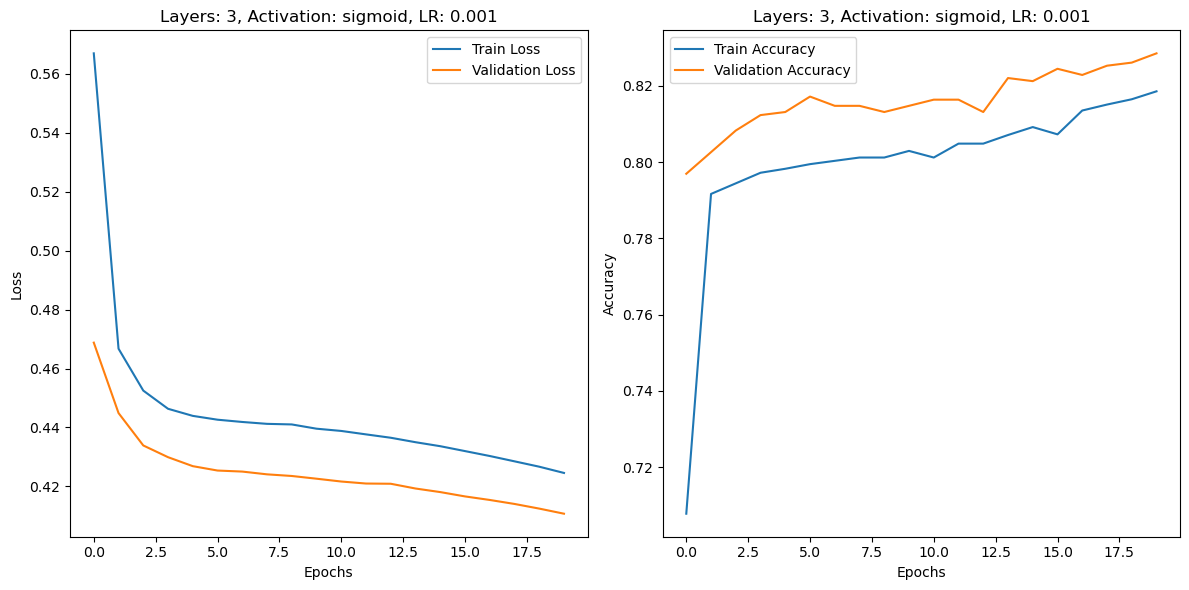

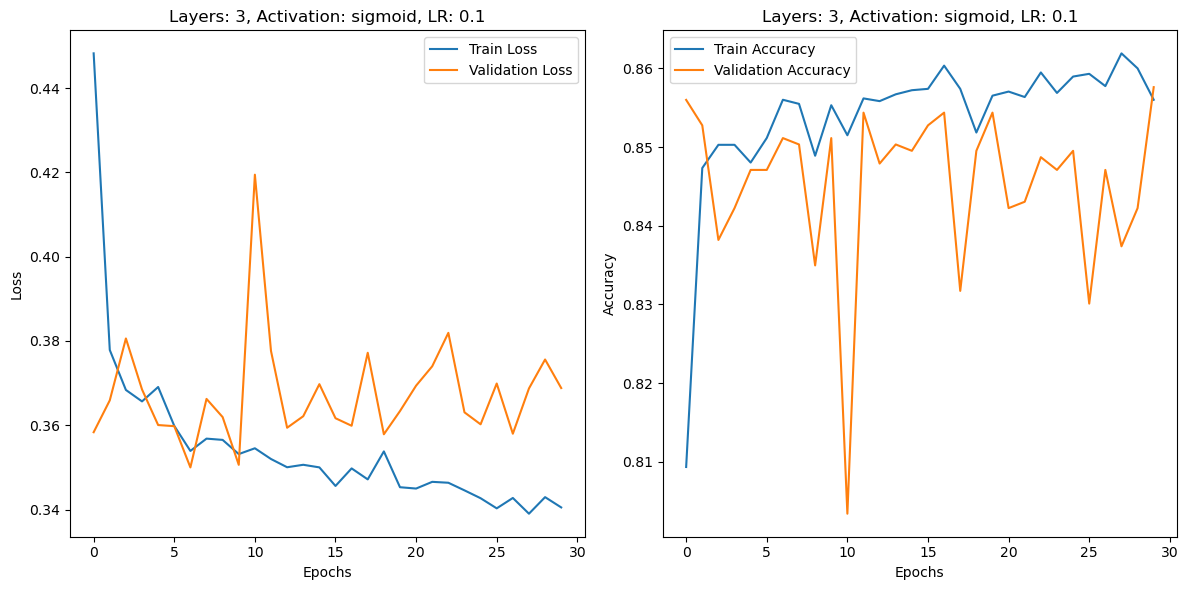

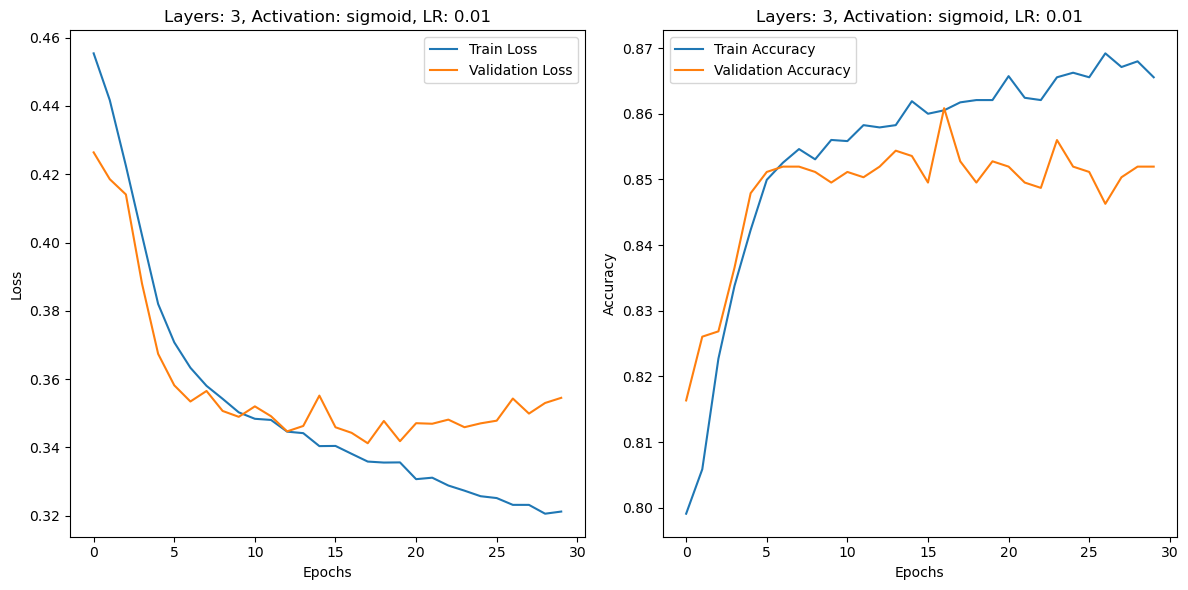

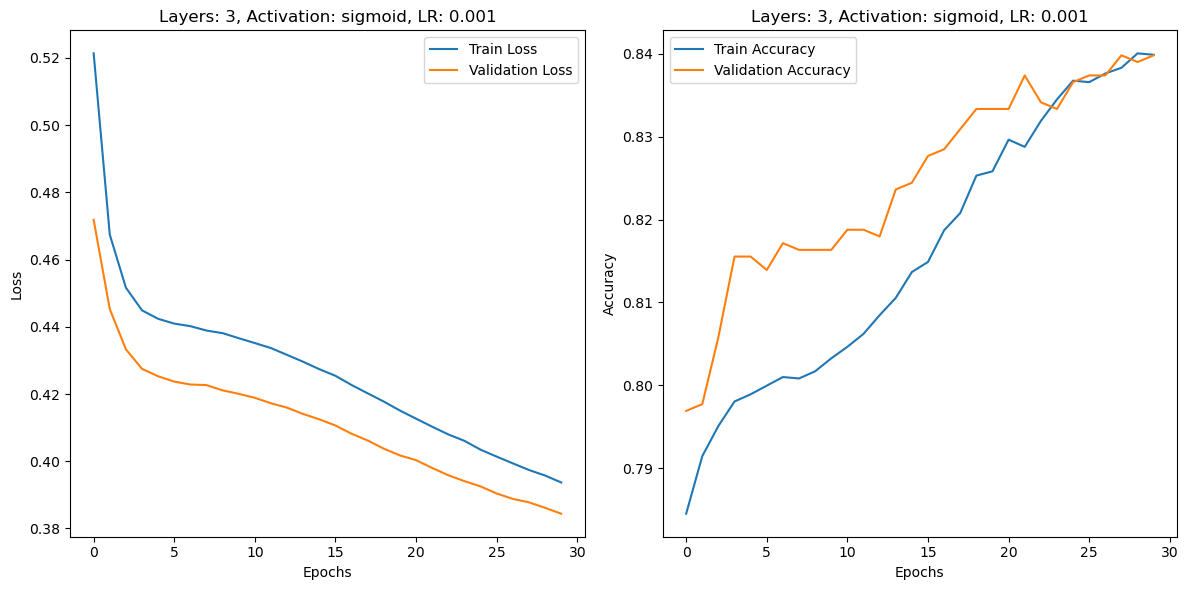

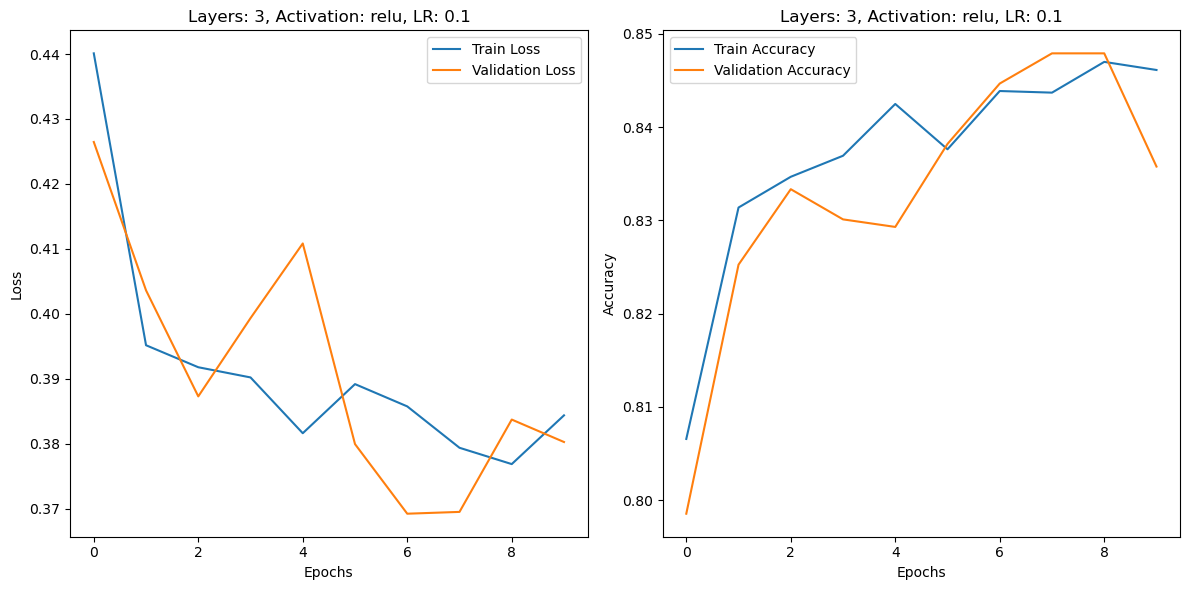

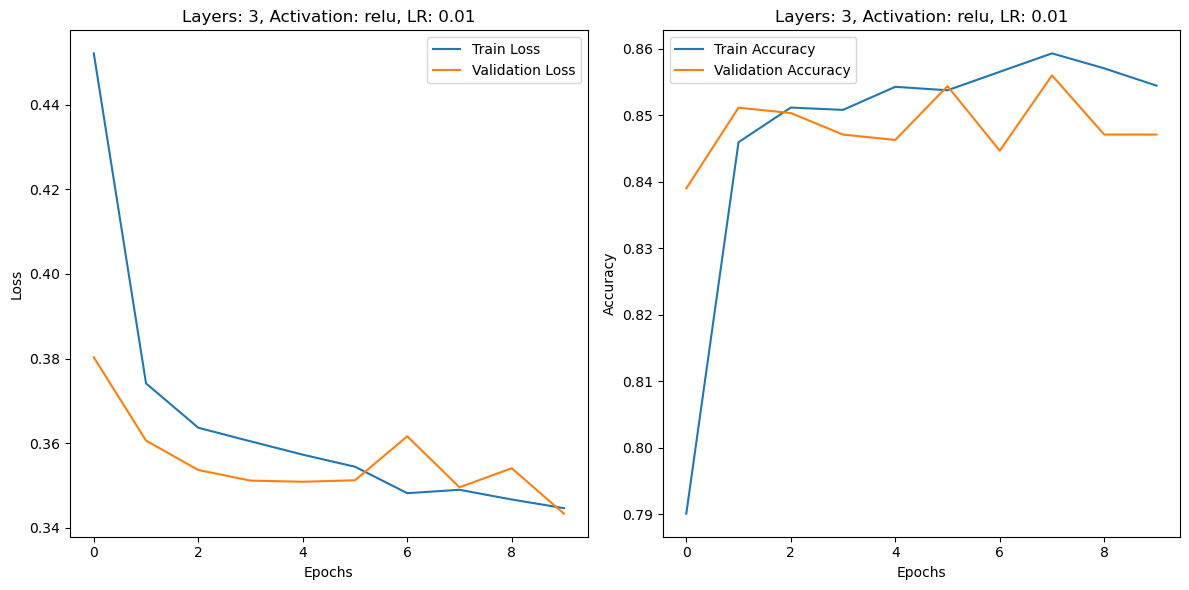

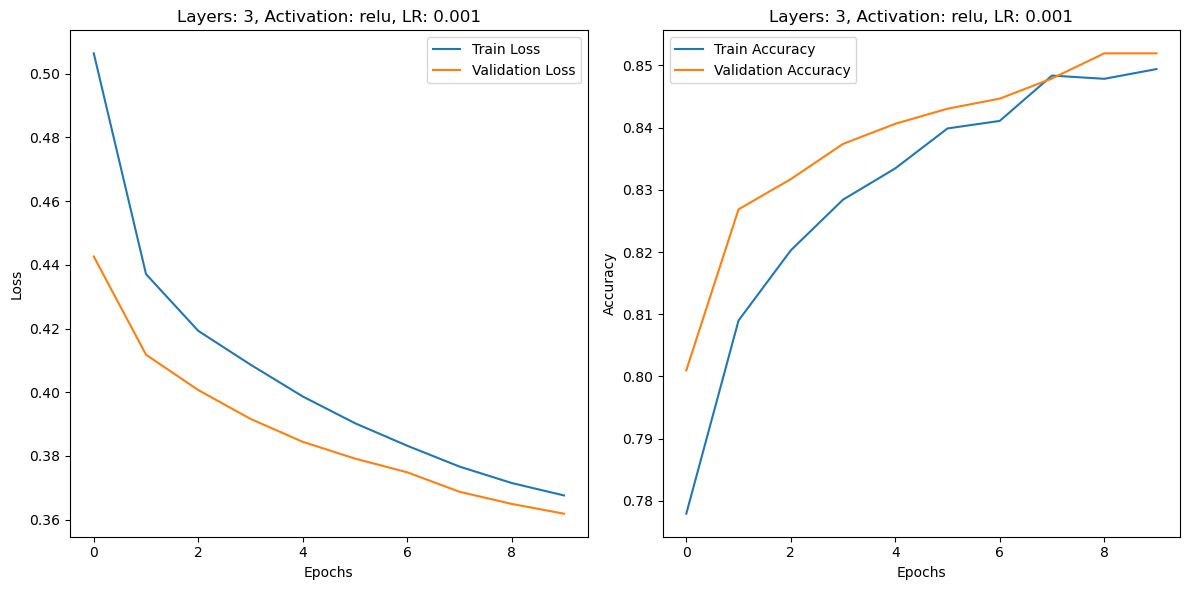

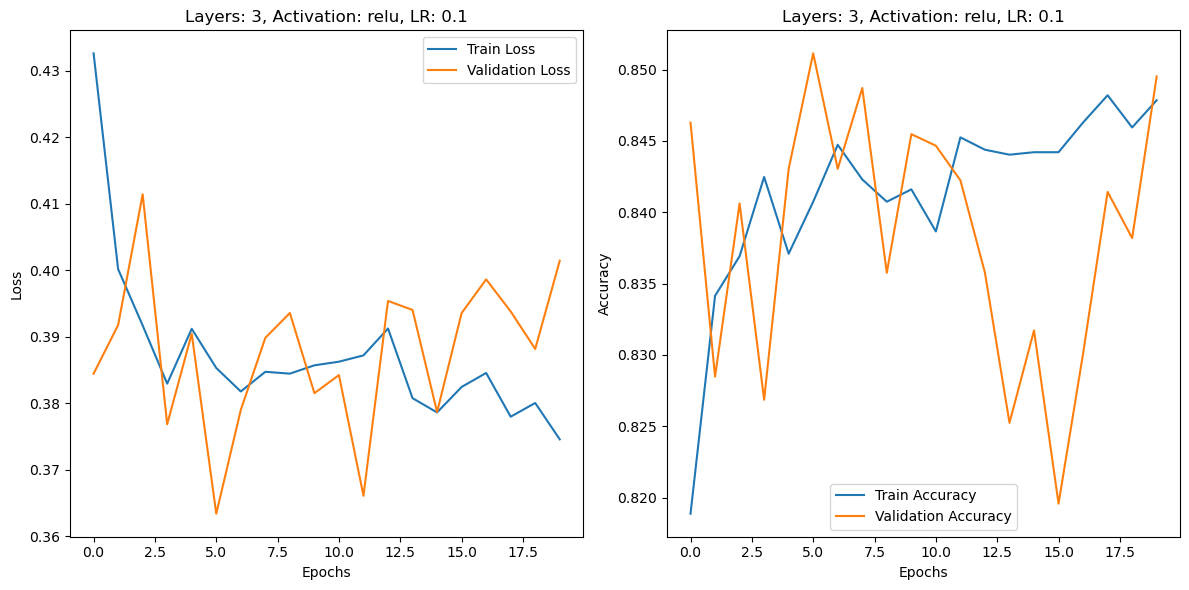

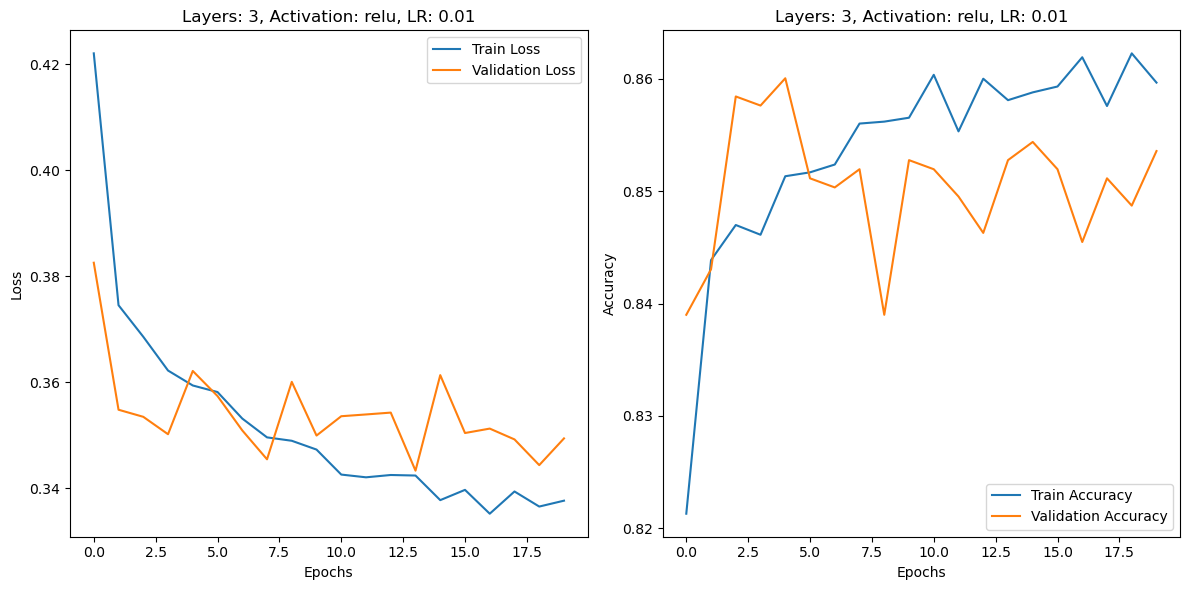

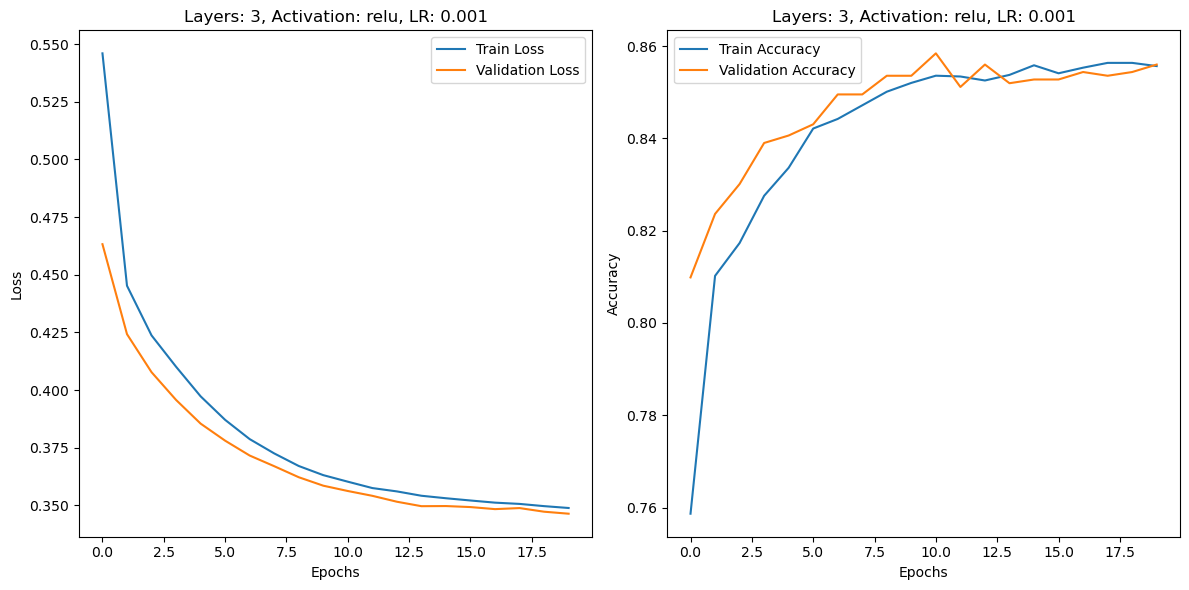

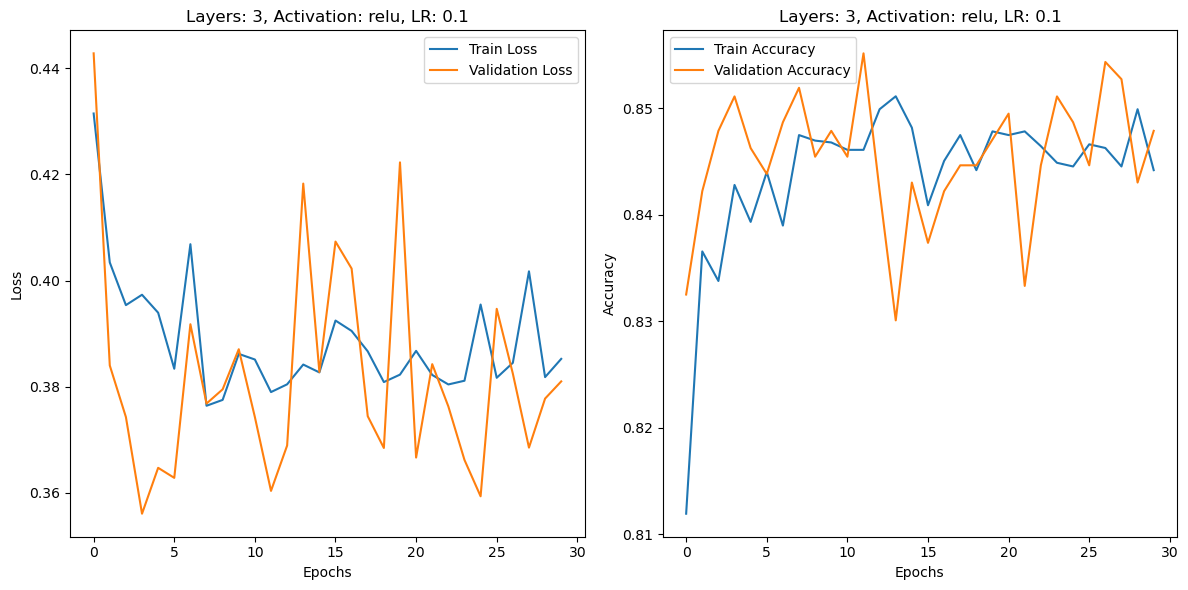

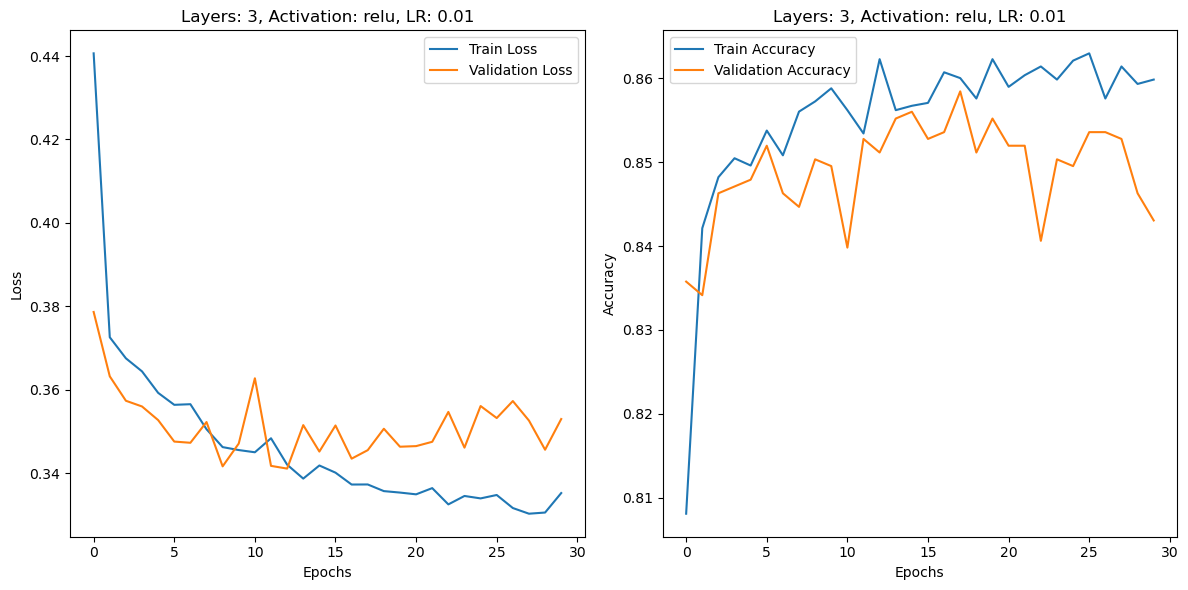

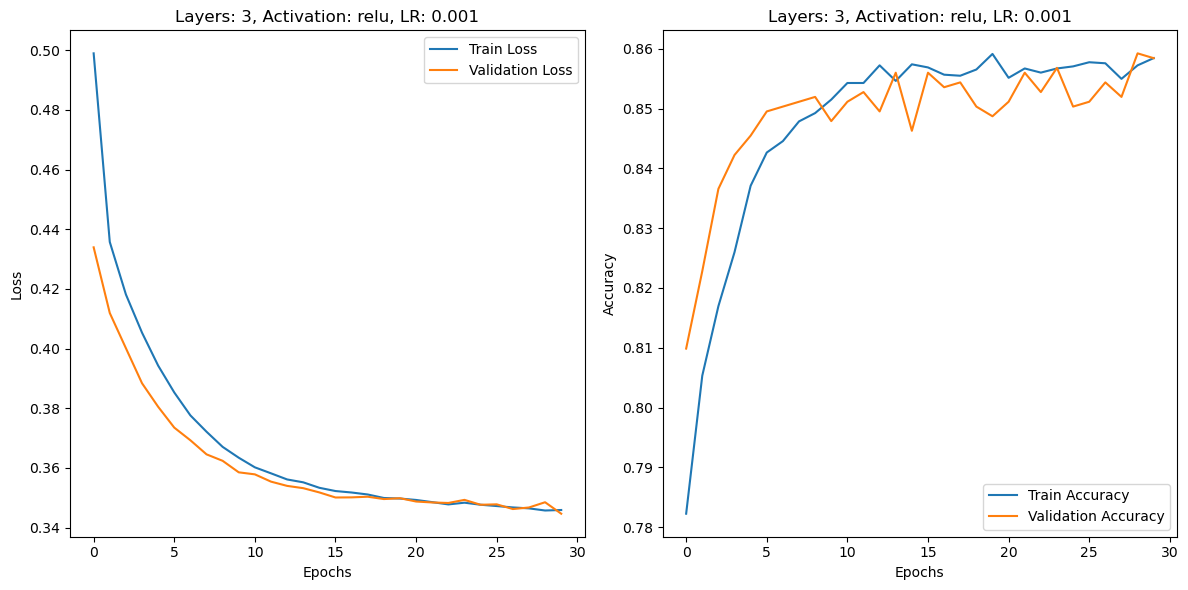

In [27]:
#plot loss and accuracy curves for each model
for data in plot_data:
    plt.figure(figsize=(12, 6))
    
    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(data['train_loss'], label='Train Loss')
    plt.plot(data['val_loss'], label='Validation Loss')
    plt.title(f'Layers: {data["layer"]}, Activation: {data["activation"]}, LR: {data["learning_rate"]}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(data['train_accuracy'], label='Train Accuracy')
    plt.plot(data['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Layers: {data["layer"]}, Activation: {data["activation"]}, LR: {data["learning_rate"]}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()